<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Career_Choice_Analysis_by_Rick_Rejeleene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Code for finding out what leads towards contributing towards particular career choices

In [1]:
import pandas as pd

# Read the CSV file
file_path = '/content/deidentified_july_30.csv'
df = pd.read_csv(file_path)

# Map abbreviated column names to full career names
career_mapping = {
    'MDnoSurg': 'Medical Doctor (Non-Surgical)',
    'Surgeon': 'Surgeon',
    'APRN': 'Advanced Practice Nurse',
    'PTorOT': 'Surgical or Occupational Therapist',
    'Imaging': 'Imaging Tech (e.g. Ultrasound, Radiology)',
    'PA': 'Physician Assistant',
    'CPerf': 'Cardiovascular Perfusionist',
    'Engineer': 'Engineer',
    'PhDScience': 'PhD Research Scientist',
    'DataAn': 'Data Analyst',
    'Nurse': 'Registered Nurse',
    'EMTPar': 'EMT / Paramedic',
    'HAdmin': 'Hospital Administration',
    'PTransp': 'Non-Clinical Support Roles',
    'SLP': 'Speech Language Pathologist',
    'Simulation': 'Certified Anesthesiologist Assistant',
    'MedLab': 'Medical Laboratory Positions',
    'RespTh': 'Respiratory Therapist',
    'Marketing': 'Marketing Professional',
    'Medill': 'Pharmacist',
    'Dentist': 'Dentist',
    'MA': 'Medical Assistant',
    'NurseAsst': 'Nurse Assistant',
    'ArtMusic': 'Art or Music Therapist'
}

# Create summary for each career
career_summary = []

for col, full_name in career_mapping.items():
    if col in df.columns:
        # Count students who are "Interested" or "Very interested"
        interested_count = df[col].isin(['Interested', 'Very interested']).sum()
        career_summary.append({
            'Career': full_name,
            'Count': interested_count
        })

# Create DataFrame and sort by count (descending)
summary_df = pd.DataFrame(career_summary)
summary_df = summary_df.sort_values('Count', ascending=False).reset_index(drop=True)

# Display the summary table
print("=" * 80)
print("CAREER INTEREST SUMMARY")
print("(Students who are 'Interested' or 'Very interested')")
print("=" * 80)
print(f"{'Career':<60} {'Count':>10}")
print("-" * 80)

for idx, row in summary_df.iterrows():
    print(f"{row['Career']:<60} {row['Count']:>10}")

print("=" * 80)
print(f"Total unique students in dataset: {len(df)}")

# Optional: Show detailed breakdown for each career
print("\n" + "=" * 80)
print("DETAILED BREAKDOWN BY INTEREST LEVEL")
print("=" * 80)

for col, full_name in career_mapping.items():
    if col in df.columns:
        print(f"\n{full_name}:")
        value_counts = df[col].value_counts(dropna=False)
        for interest_level, count in value_counts.items():
            print(f"  {str(interest_level):<30} {count:>5}")

CAREER INTEREST SUMMARY
(Students who are 'Interested' or 'Very interested')
Career                                                            Count
--------------------------------------------------------------------------------
Medical Doctor (Non-Surgical)                                       662
Surgeon                                                             490
Advanced Practice Nurse                                             303
Physician Assistant                                                 257
Imaging Tech (e.g. Ultrasound, Radiology)                           255
PhD Research Scientist                                              251
Registered Nurse                                                    209
Medical Laboratory Positions                                        200
EMT / Paramedic                                                     188
Medical Assistant                                                   179
Cardiovascular Perfusionist                       

Candidate career columns: ['PrefCareer', 'Other Career', 'WhyCareer', 'DiffCareer', 'form 2. Master Pre-Survey 43) Think about the healthcare career that you selecte']
Using 'PrefCareer' as career column.

Surgeon choice counts:
surgeon_choice
0    1012
1     224
Name: count, dtype: int64

Dropping leaky surgeon-related columns:
['SurgeonQ', 'MDnoSurgTop', 'SurgTop']

Number of feature columns after dropping leaks: 192
Example features: ['Filter 2', 'Step name', 'Older Repeat', 'Repeat', 'Program', 'Program - ProgRecde', 'ProgramRec', 'High School', 'YOUNew', 'HSShadow', 'HSExt', 'HSFinPr', 'AdShadow', 'SIP', 'AdOthDum', 'PastPart', 'YouthOrgs', 'RaceEth', 'RaceEth2', 'Gender', 'BiGender', 'Pronouns', 'Grade', 'Age', 'Citizen']

Encoded feature matrix shape: (1236, 3651)

New Test AUC (after dropping leaky vars): 0.9970443349753695

Classification report (threshold 0.5):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       203
       


Top 20 features by mean |SHAP| AFTER dropping leaky vars:
                                             feature  mean_abs_shap
1826                        PrefCarwithOther_Surgeon       3.254489
59                                           Doctors       0.910018
1685                         Surgeon_Very interested       0.821608
1831                                       Top5_Surg       0.605724
1808  PrefCarwithOther_Medical Doctor (non-surgical)       0.381096
3185                                 DiffCareer_True       0.329862
85                                         Lifestyle       0.290160
1703                       Simulation_Not interested       0.279674
1691                            Nurse_Not interested       0.237292
27                                         MDnoSurgQ       0.151278
37                                            OptomQ       0.142009
99                                         NursePath       0.103690
1715                           Medill_Not interested     

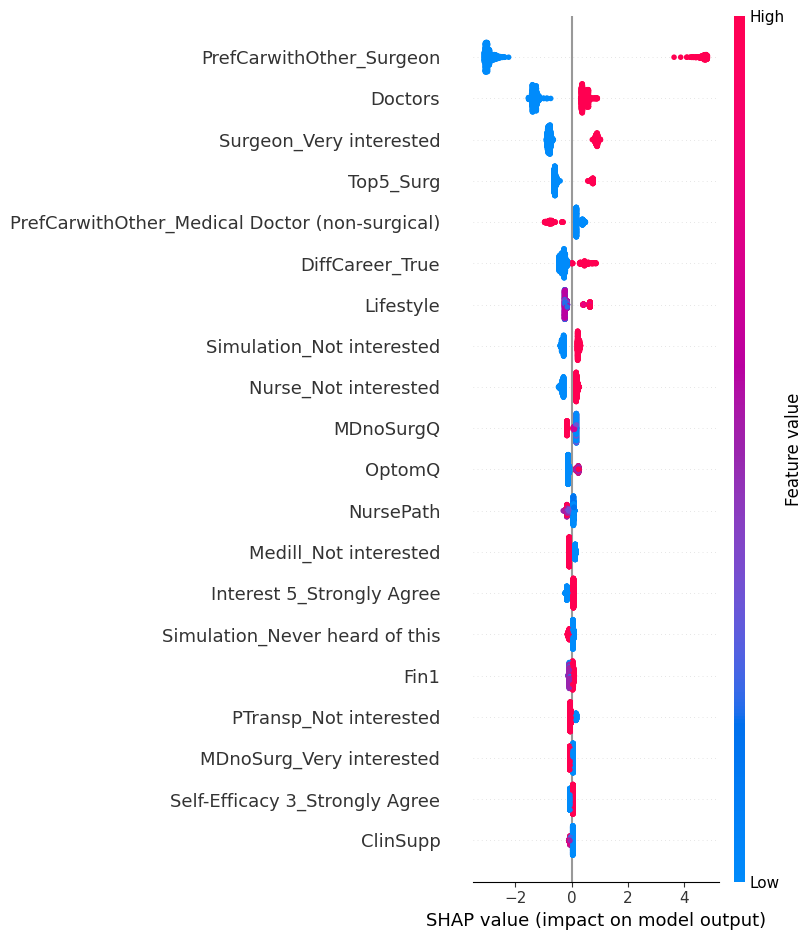

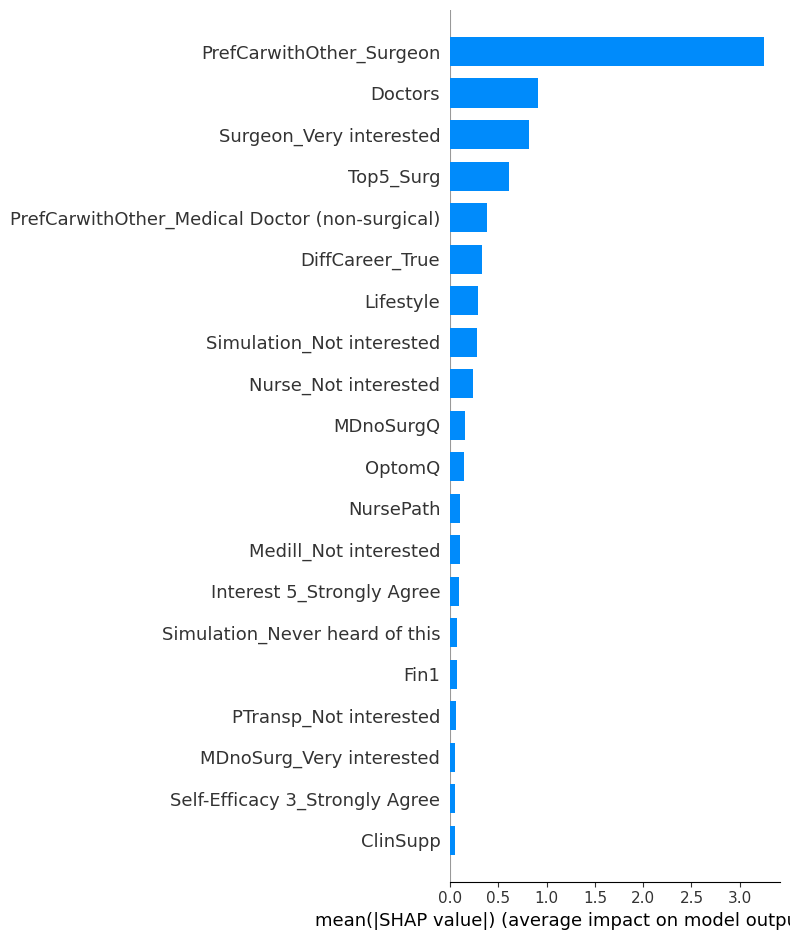


=== Student index: 0 ===
True label (surgeon_choice): 0
Predicted P(surgeon): 0.000

Top positive contributors (push TOWARD surgeon):
MDnoSurgQ                                         0.166194
PrefCarwithOther_Medical Doctor (non-surgical)    0.163900
Interest 5_Strongly Agree                         0.054688
Age                                               0.051776
MDnoSurg_Very interested                          0.049541
Name: 0, dtype: float32

Top negative contributors (push AWAY FROM surgeon):
Nurse_Not interested       -0.290316
Top5_Surg                  -0.612457
Surgeon_Very interested    -0.784784
Doctors                    -1.263211
PrefCarwithOther_Surgeon   -3.039918
Name: 0, dtype: float32

=== Student index: 1 ===
True label (surgeon_choice): 1
Predicted P(surgeon): 0.225

Top positive contributors (push TOWARD surgeon):
Surgeon_Very interested                           0.945943
Doctors                                           0.798591
DiffCareer_True                

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

from xgboost import XGBClassifier
import shap

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("/content/deidentified_july_30.csv")

# -----------------------------
# 2. Identify career column & outcome
# -----------------------------
career_candidates = [c for c in df.columns if "career" in c.lower()]
print("Candidate career columns:", career_candidates)

if len(career_candidates) == 0:
    raise ValueError("No column with 'career' in its name; set career_col manually.")
career_col = career_candidates[0]
print(f"Using '{career_col}' as career column.\n")

df["surgeon_choice"] = (df[career_col] == "Surgeon").astype(int)

print("Surgeon choice counts:")
print(df["surgeon_choice"].value_counts())
print()

# -----------------------------
# 3. Define features (X) and drop leaky surgeon vars
# -----------------------------
# 3.1 Drop IDs and target columns
id_like_cols = [c for c in df.columns if "id" in c.lower()]
base_drop = set(id_like_cols + [career_col, "surgeon_choice"])

# 3.2 Drop obviously leaky surgeon-related predictors
leaky_patterns = [
    "SurgTop",                # top surgeon choice
    "SurgeonQ",               # surgeon question
    "Top5_Surg",              # surgeon in top 5
    "PrefCarwithOther_Surgeon",
    "Surgeon_Very interested",
    "Surgeon " ,              # in case there's "Surgeon Something"
    " Surgeon",               # trailing
]

leaky_cols = []
for c in df.columns:
    for pat in leaky_patterns:
        if pat in c:
            leaky_cols.append(c)
            break

print("Dropping leaky surgeon-related columns:")
print(leaky_cols)
print()

cols_to_drop = base_drop.union(leaky_cols)

feature_cols = [c for c in df.columns if c not in cols_to_drop]
print("Number of feature columns after dropping leaks:", len(feature_cols))
print("Example features:", feature_cols[:25])
print()

X_raw = df[feature_cols].copy()
y = df["surgeon_choice"].copy()

# -----------------------------
# 4. Encode and handle missing
# -----------------------------
X = pd.get_dummies(X_raw, drop_first=True)
X = X.fillna(X.median(numeric_only=True))

print("Encoded feature matrix shape:", X.shape)
print()

# -----------------------------
# 5. Train/test split & model
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

model = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_test_proba = model.predict_proba(X_test)[:, 1]
print("New Test AUC (after dropping leaky vars):", roc_auc_score(y_test, y_test_proba))
print("\nClassification report (threshold 0.5):")
print(classification_report(y_test, (y_test_proba > 0.5).astype(int)))

# -----------------------------
# 6. SHAP explanations
# -----------------------------
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    shap_values = shap_values[1]

shap_df = pd.DataFrame(shap_values, columns=X.columns, index=df.index)
pred_proba_all = model.predict_proba(X)[:, 1]

results = df.copy()
results["predicted_proba_surgeon"] = pred_proba_all

# Global importance
mean_abs_shap = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    "feature": X.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

print("\nTop 20 features by mean |SHAP| AFTER dropping leaky vars:")
print(importance_df.head(20))

# SHAP summary plots
shap.summary_plot(shap_values, X, max_display=20)
shap.summary_plot(shap_values, X, plot_type="bar", max_display=20)

# -----------------------------
# 7. Per-student explanation
# -----------------------------
def explain_student(idx, top_n=5):
    shap_row = shap_df.loc[idx]
    proba = results.loc[idx, "predicted_proba_surgeon"]
    true_label = results.loc[idx, "surgeon_choice"]

    shap_sorted = shap_row.sort_values(ascending=False)

    print(f"\n=== Student index: {idx} ===")
    print(f"True label (surgeon_choice): {true_label}")
    print(f"Predicted P(surgeon): {proba:.3f}\n")

    print("Top positive contributors (push TOWARD surgeon):")
    print(shap_sorted.head(top_n))

    print("\nTop negative contributors (push AWAY FROM surgeon):")
    print(shap_sorted.tail(top_n))

# Example: first 3 students
for idx in list(X.index[:3]):
    explain_student(idx, top_n=5)


Original shape: (1236, 197)
Shape after filtering to target careers: (620, 197)

Career value counts:
PrefCareer
Surgeon                               224
Physical or Occupational Therapist     74
Physician Assistant                    68
Cardiovascular Perfusionist            39
Registered Nurse                       28
Engineer                               28
PhD Research Scientist                 27
Data Analyst                           26
EMT / Paramedic                        26
Hospital Administration                22
Respiratory Therapist                  11
Marketing Professional                 10
Art or Music Therapist                  9
Medical Assistant                       8
Speech Language Pathologist             8
Dentist                                 6
Nurse Assistant                         6
Name: count, dtype: int64

Dropping columns from predictors: ['PrefCareer', 'SurgeonQ', 'MDnoSurgTop', 'SurgTop', 'Other Career', 'WhyCareer', 'DiffCareer', 'form 2. Master 

100%|===================| 8418/8432 [08:19<00:00]       

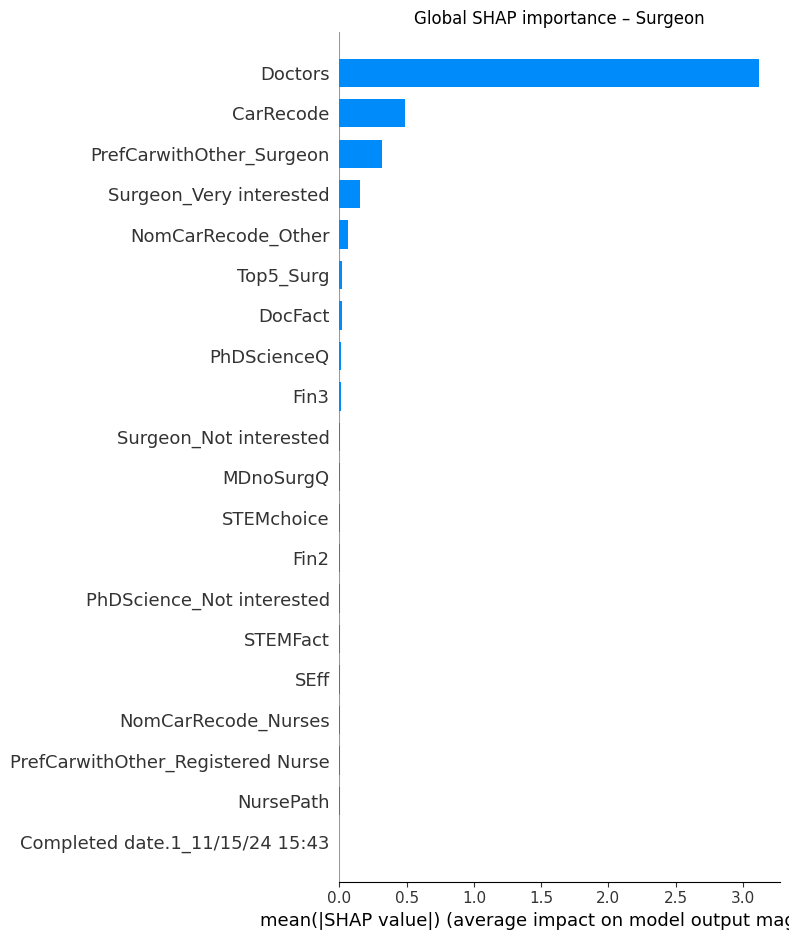

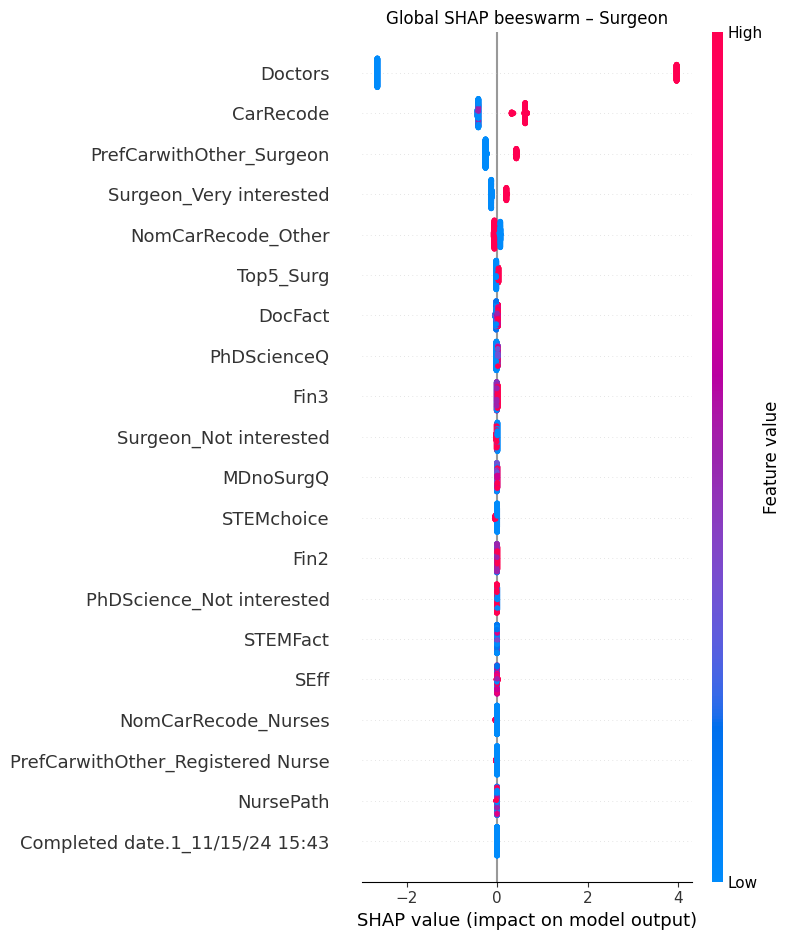


Top 15 features driving choice: Surgeon
                  feature  mean_abs_shap
                  Doctors       3.121377
                CarRecode       0.487100
 PrefCarwithOther_Surgeon       0.313617
  Surgeon_Very interested       0.152896
       NomCarRecode_Other       0.064896
                Top5_Surg       0.021103
                  DocFact       0.017591
              PhDScienceQ       0.014586
                     Fin3       0.008318
   Surgeon_Not interested       0.007561
                MDnoSurgQ       0.006126
               STEMchoice       0.006058
                     Fin2       0.004788
PhDScience_Not interested       0.004636
                 STEMFact       0.002575

[WARN] Career 'Medical Doctor (Non-Surgical)' not found in encoded classes. Skipping.

[WARN] Career 'Advance Practice Nurse' not found in encoded classes. Skipping.


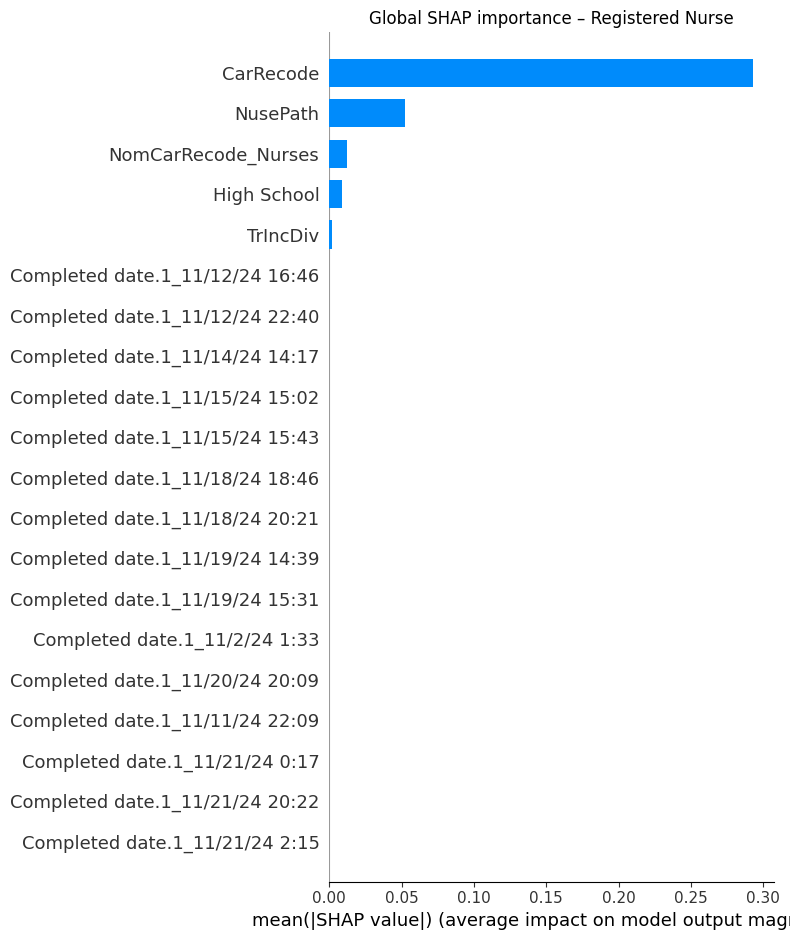

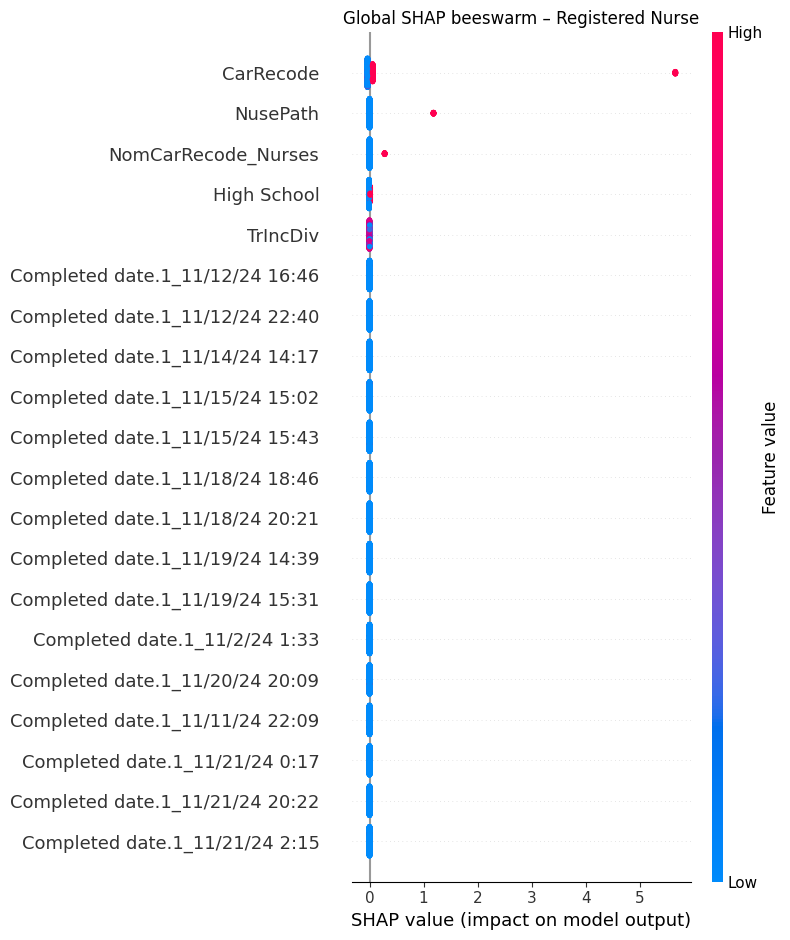


Top 15 features driving choice: Registered Nurse
                   feature  mean_abs_shap
                 CarRecode       0.293159
                  NusePath       0.052473
       NomCarRecode_Nurses       0.012382
               High School       0.008624
                  TrIncDiv       0.001956
     EMTPar_Not interested       0.000000
EMTPar_Never heard of this       0.000000
     Nurse_Very interested       0.000000
 Nurse_Somewhat interested       0.000000
      Nurse_Not interested       0.000000
 Nurse_Never heard of this       0.000000
        PA_Very interested       0.000000
    PA_Somewhat interested       0.000000
         PA_Not interested       0.000000
    PA_Never heard of this       0.000000


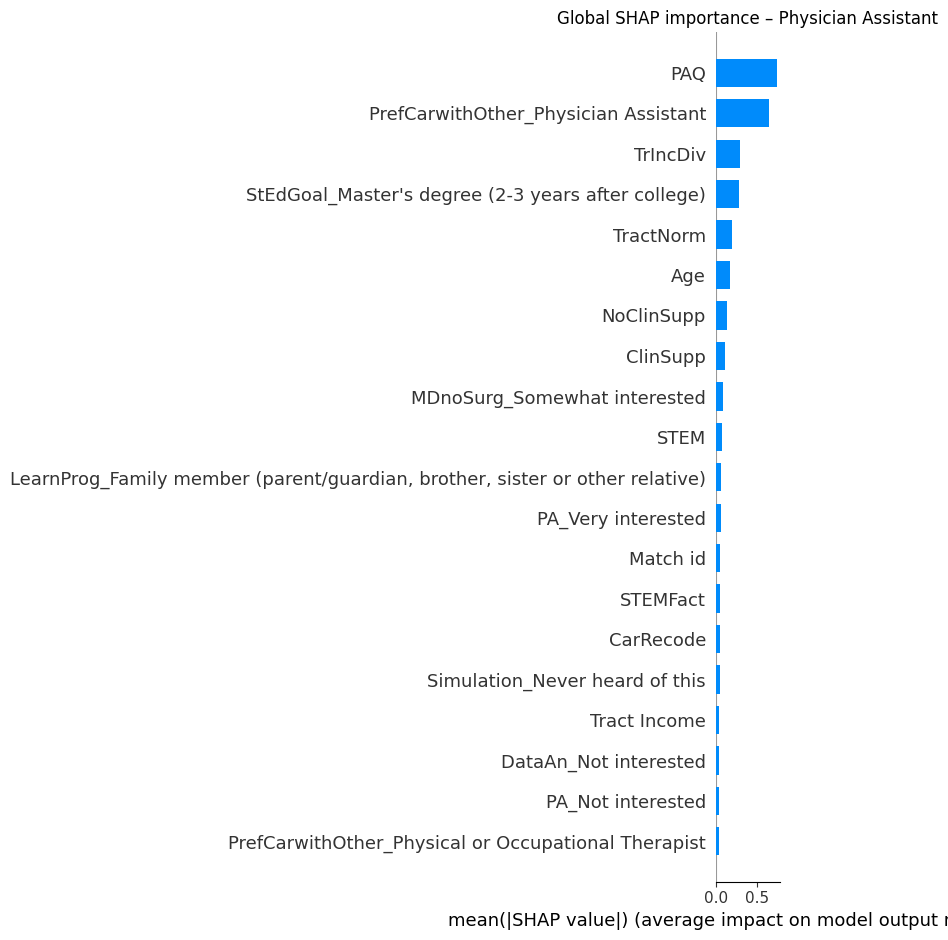

/tmp/ipython-input-1367518749.py:262: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


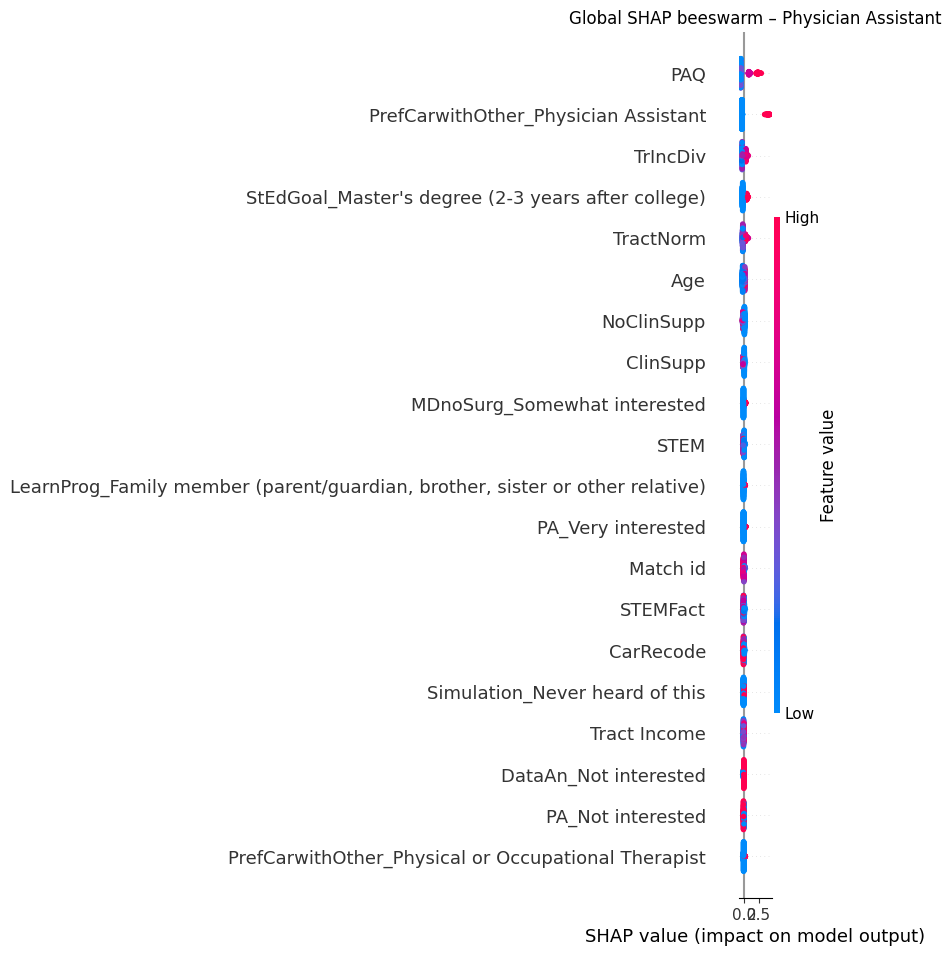


Top 15 features driving choice: Physician Assistant
                                                                     feature  mean_abs_shap
                                                                         PAQ       0.736223
                                        PrefCarwithOther_Physician Assistant       0.638097
                                                                    TrIncDiv       0.294370
                          StEdGoal_Master's degree (2-3 years after college)       0.281366
                                                                   TractNorm       0.195548
                                                                         Age       0.172906
                                                                  NoClinSupp       0.134710
                                                                    ClinSupp       0.108041
                                                MDnoSurg_Somewhat interested       0.087221
                           

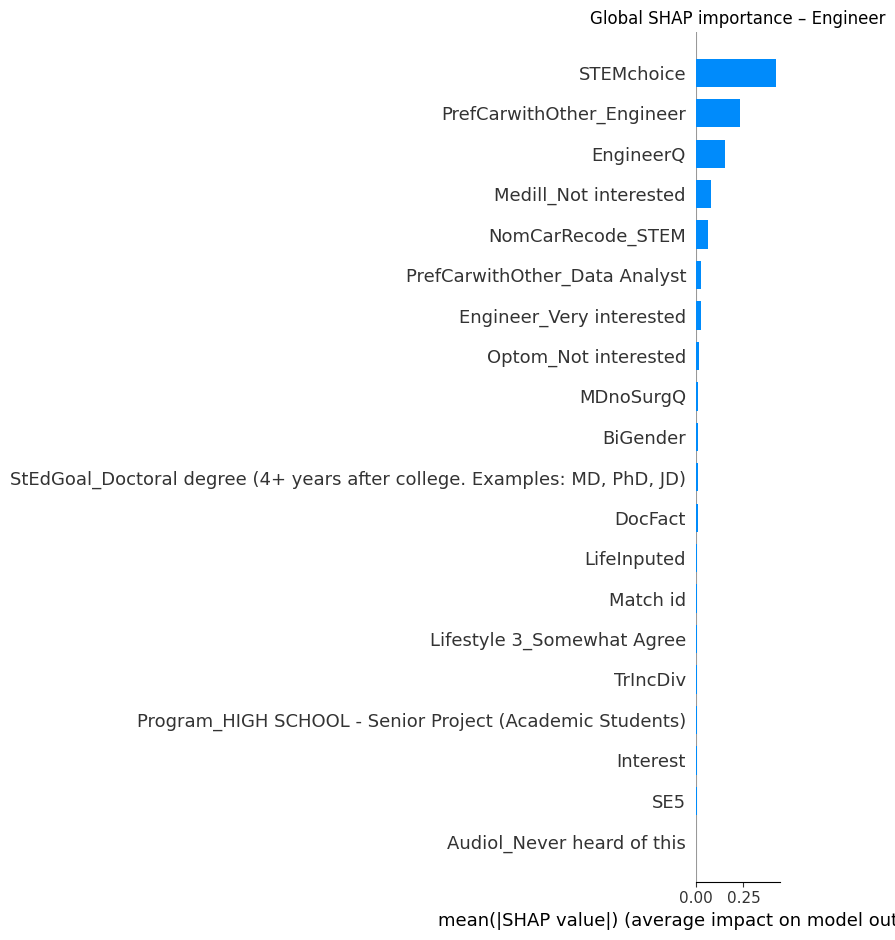

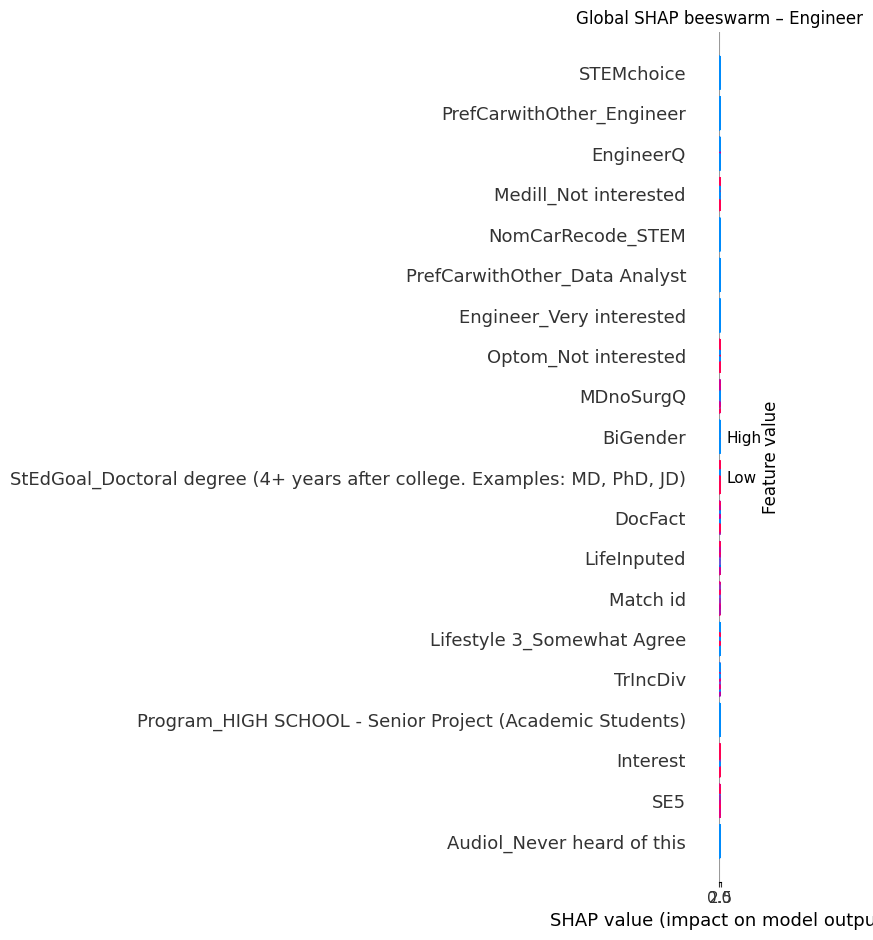


Top 15 features driving choice: Engineer
                                                                 feature  mean_abs_shap
                                                              STEMchoice       0.420872
                                               PrefCarwithOther_Engineer       0.234121
                                                               EngineerQ       0.152041
                                                   Medill_Not interested       0.078242
                                                       NomCarRecode_STEM       0.062743
                                           PrefCarwithOther_Data Analyst       0.029526
                                                Engineer_Very interested       0.026053
                                                    Optom_Not interested       0.016970
                                                               MDnoSurgQ       0.013382
                                                                BiGender      

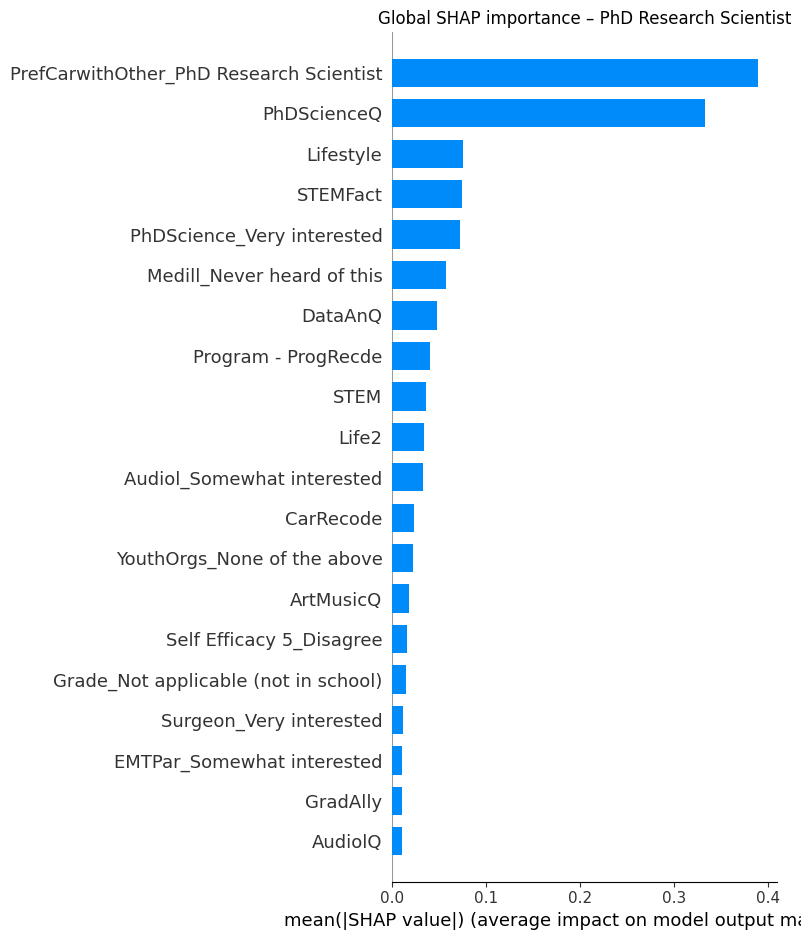

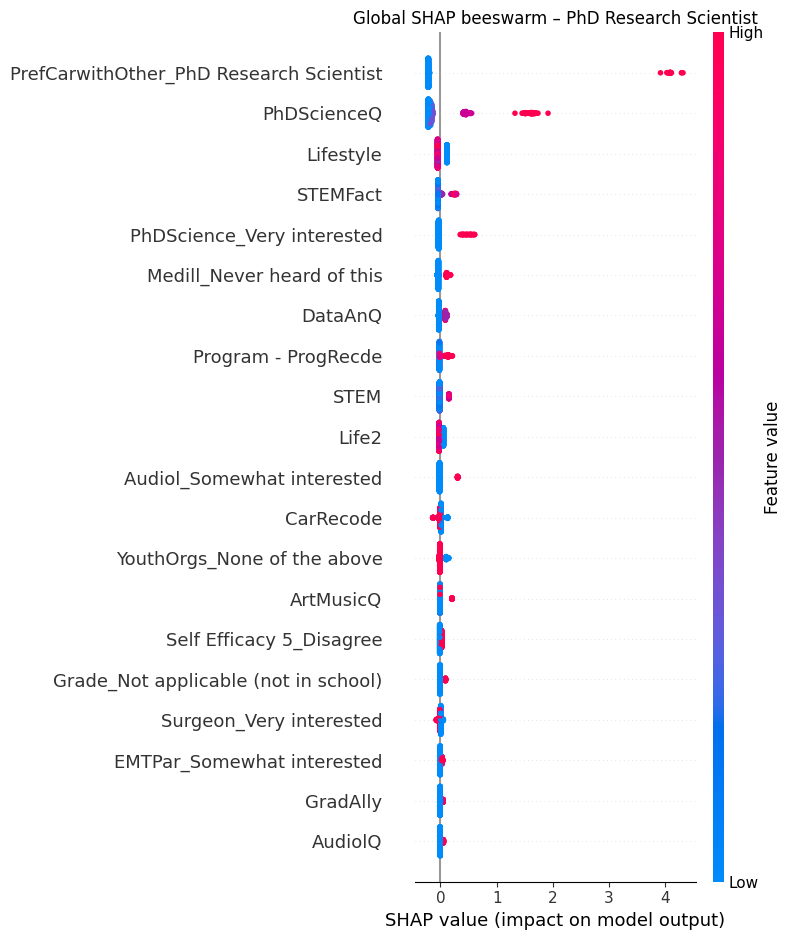


Top 15 features driving choice: PhD Research Scientist
                                feature  mean_abs_shap
PrefCarwithOther_PhD Research Scientist       0.389858
                            PhDScienceQ       0.332908
                              Lifestyle       0.075746
                               STEMFact       0.073990
             PhDScience_Very interested       0.072321
             Medill_Never heard of this       0.057487
                                DataAnQ       0.048020
                    Program - ProgRecde       0.040732
                                   STEM       0.035734
                                  Life2       0.034197
             Audiol_Somewhat interested       0.032408
                              CarRecode       0.023246
            YouthOrgs_None of the above       0.022530
                              ArtMusicQ       0.017615
               Self Efficacy 5_Disagree       0.015445


In [9]:
# ============================================
# 0. Setup: imports & options
# ============================================
# If needed, install dependencies first:
# !pip install shap xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 220)

# ============================================
# 1. Load data
# ============================================
DATA_PATH = "/content/deidentified_july_30.csv"
TARGET_COL = "PrefCareer"

df = pd.read_csv(DATA_PATH)
print("Original shape:", df.shape)

# ============================================
# 2. Restrict to the target careers
# ============================================
target_careers = [
    "Medical Doctor (Non-Surgical)",
    "Surgeon",
    "Advance Practice Nurse",
    "Physical or Occupational Therapist",
    "Imaging Tech (e.g. Ultrasound, Radiology)",
    "Physician Assistant",
    "Cardiovascular Perfusionist",
    "Engineer",
    "PhD Research Scientist",
    "Data Analyst",
    "Registered Nurse",
    "EMT / Paramedic",
    "Hospital Administration",
    "Non-Clinical Support Roles (e.g., Patient Transport, Environmental Services)",
    "Speech Language Pathologist",
    "Certified Anesthesiologist Assistant",
    "Medical Laboratory Positions (e.g. Lab Tech, Cytotechnologist, Medical Laboratory Scientist)",
    "Respiratory Therapist",
    "Marketing Professional",
    "Pharmacist",
    "Dentist",
    "Medical Assistant",
    "Nurse Assistant",
    "Art or Music Therapist",
    "Other",
]

df = df[df[TARGET_COL].isin(target_careers)].copy()
print("Shape after filtering to target careers:", df.shape)

# Quick check of counts
print("\nCareer value counts:")
print(df[TARGET_COL].value_counts())

# ============================================
# 3. Drop leaky / text columns & define X, y
# ============================================
# Columns that directly reveal surgeon / MD or describe career preferences
leak_cols = ["SurgeonQ", "MDnoSurgTop", "SurgTop"]
text_career_cols = [
    "Other Career",
    "WhyCareer",
    "DiffCareer",
    "form 2. Master Pre-Survey 43) Think about the healthcare career that you selecte",
]

cols_to_drop = [TARGET_COL] + [c for c in (leak_cols + text_career_cols) if c in df.columns]
print("\nDropping columns from predictors:", cols_to_drop)

y = df[TARGET_COL].copy()
X = df.drop(columns=cols_to_drop)

print("Predictor matrix initial shape:", X.shape)

# ============================================
# 4. Encode target and features
# ============================================
# ---- target: PrefCareer ----
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

print("\nEncoded career classes (label_encoder.classes_):")
for idx, name in enumerate(label_encoder.classes_):
    print(f"{idx}: {name}")

# ---- features: make everything numeric ----
# (a) treat any non-numeric column as categorical and one-hot encode
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNon-numeric (categorical) feature columns:", len(cat_cols))
if len(cat_cols) > 0:
    print("Example categorical cols:", cat_cols[:10])

X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# (b) force all to numeric float & handle weird entries
X_enc = X_enc.apply(pd.to_numeric, errors="coerce")
X_enc = X_enc.fillna(0.0).astype(float)

print("\nEncoded X shape:", X_enc.shape)
print("Dtype counts in X_enc:")
print(X_enc.dtypes.value_counts())

feature_names = X_enc.columns

# ============================================
# 5. Train / test split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_enc,
    y_enc,
    test_size=0.2,
    stratify=y_enc,
    random_state=42,
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# ============================================
# 6. Fit multi-class XGBoost model
# ============================================
num_classes = len(label_encoder.classes_)

model = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=num_classes,
    eval_metric="mlogloss",
    tree_method="hist",    # change to "gpu_hist" if GPU is available
    random_state=42,
)

model.fit(X_train, y_train)

# Optional: quick sanity check on accuracy
train_acc = (model.predict(X_train) == y_train).mean()
test_acc = (model.predict(X_test) == y_test).mean()
print(f"\nTrain accuracy: {train_acc:.3f}")
print(f"Test accuracy : {test_acc:.3f}")

# ============================================
# 7. Build SHAP explainer (numeric data only)
# ============================================
shap.initjs()

# Use a subset of training data as background for speed
if X_train.shape[0] > 2000:
    background = shap.sample(X_train, 2000, random_state=42)
else:
    background = X_train

explainer = shap.TreeExplainer(model, data=background)

# shap_values can be:
#  - list of length num_classes: each (n_samples, n_features)
#  - array of shape (n_samples, n_features, num_classes)
shap_values_raw = explainer.shap_values(X_train)

def get_shap_for_class(shap_values, class_idx):
    """
    Normalize SHAP output shape to (n_samples, n_features) for a given class.
    Handles both list and 3D array formats.
    """
    if isinstance(shap_values, list):
        # classic multi-class output: list[num_classes] of (n_samples, n_features)
        return shap_values[class_idx]
    elif isinstance(shap_values, np.ndarray):
        if shap_values.ndim == 3:
            # shape: (n_samples, n_features, num_classes)
            return shap_values[:, :, class_idx]
        elif shap_values.ndim == 2:
            # shape: (n_samples, n_features) – then we can't split by class
            raise ValueError(
                "SHAP returned a 2D array; cannot separate by class index. "
                "Check SHAP version / model settings."
            )
        else:
            raise ValueError(f"Unexpected SHAP array shape: {shap_values.shape}")
    else:
        raise TypeError("Unsupported SHAP values format")

# Precompute per-class shap matrices
shap_values_by_class = [
    get_shap_for_class(shap_values_raw, k) for k in range(num_classes)
]

# ============================================
# 8. Helper: top SHAP features (global) for a career
# ============================================
def show_top_features_for_class(class_index, top_k=20):
    """
    Print top features by mean absolute SHAP value for the given class.
    """
    shap_mat = shap_values_by_class[class_index]     # (n_samples, n_features)
    mean_abs = np.abs(shap_mat).mean(axis=0)
    importance_df = pd.DataFrame({
        "feature": feature_names,
        "mean_abs_shap": mean_abs
    }).sort_values("mean_abs_shap", ascending=False)

    career_name = label_encoder.classes_[class_index]
    print(f"\nTop {top_k} features driving choice: {career_name}")
    print(importance_df.head(top_k).to_string(index=False))

# ============================================
# 9. Global SHAP summary plots for selected careers
# ============================================
# You can edit this list to include any subset
careers_of_interest = [
    "Surgeon",
    "Medical Doctor (Non-Surgical)",
    "Advance Practice Nurse",
    "Registered Nurse",
    "Physician Assistant",
    "Engineer",
    "PhD Research Scientist",
]

for career in careers_of_interest:
    if career not in label_encoder.classes_:
        print(f"\n[WARN] Career '{career}' not found in encoded classes. Skipping.")
        continue

    class_idx = np.where(label_encoder.classes_ == career)[0][0]
    shap_mat = shap_values_by_class[class_idx]

    # ---- (a) bar plot: global importance ----
    shap.summary_plot(
        shap_mat,
        X_train,
        feature_names=feature_names,
        plot_type="bar",
        max_display=20,
        show=False,
    )
    plt.title(f"Global SHAP importance – {career}")
    plt.tight_layout()
    plt.show()

    # ---- (b) beeswarm plot: magnitude + direction ----
    shap.summary_plot(
        shap_mat,
        X_train,
        feature_names=feature_names,
        max_display=20,
        show=False,
    )
    plt.title(f"Global SHAP beeswarm – {career}")
    plt.tight_layout()
    plt.show()

    # ---- (c) top features printed ----
    show_top_features_for_class(class_idx, top_k=15)

# ============================================
# 10. (Optional) Loop over ALL careers and save plots
# ============================================
save_all = False  # set True if you want PNG files for every career

if save_all:
    for class_idx, career in enumerate(label_encoder.classes_):
        shap_mat = shap_values_by_class[class_idx]

        # Bar summary plot
        shap.summary_plot(
            shap_mat,
            X_train,
            feature_names=feature_names,
            plot_type="bar",
            max_display=15,
            show=False,
        )
        plt.title(f"Global SHAP importance – {career}")
        plt.tight_layout()

        safe_name = (
            career.replace(" ", "_")
                  .replace("/", "_")
                  .replace("(", "")
                  .replace(")", "")
                  .replace(",", "")
        )
        plt.savefig(f"shap_importance_{safe_name}.png", dpi=150)
        plt.close()

        # Beeswarm plot
        shap.summary_plot(
            shap_mat,
            X_train,
            feature_names=feature_names,
            max_display=15,
            show=False,
        )
        plt.title(f"Global SHAP beeswarm – {career}")
        plt.tight_layout()
        plt.savefig(f"shap_beeswarm_{safe_name}.png", dpi=150)
        plt.close()

        print(f"Saved SHAP plots for: {career}")


Original shape: (1236, 197)
Shape after filtering to target careers: (620, 197)

Career value counts:
PrefCareer
Surgeon                               224
Physical or Occupational Therapist     74
Physician Assistant                    68
Cardiovascular Perfusionist            39
Registered Nurse                       28
Engineer                               28
PhD Research Scientist                 27
Data Analyst                           26
EMT / Paramedic                        26
Hospital Administration                22
Respiratory Therapist                  11
Marketing Professional                 10
Art or Music Therapist                  9
Medical Assistant                       8
Speech Language Pathologist             8
Dentist                                 6
Nurse Assistant                         6
Name: count, dtype: int64

Dropping columns from predictors: ['PrefCareer', 'SurgeonQ', 'MDnoSurgTop', 'SurgTop', 'Other Career', 'WhyCareer', 'DiffCareer', 'form 2. Master 

100%|===================| 8428/8432 [08:33<00:00]       

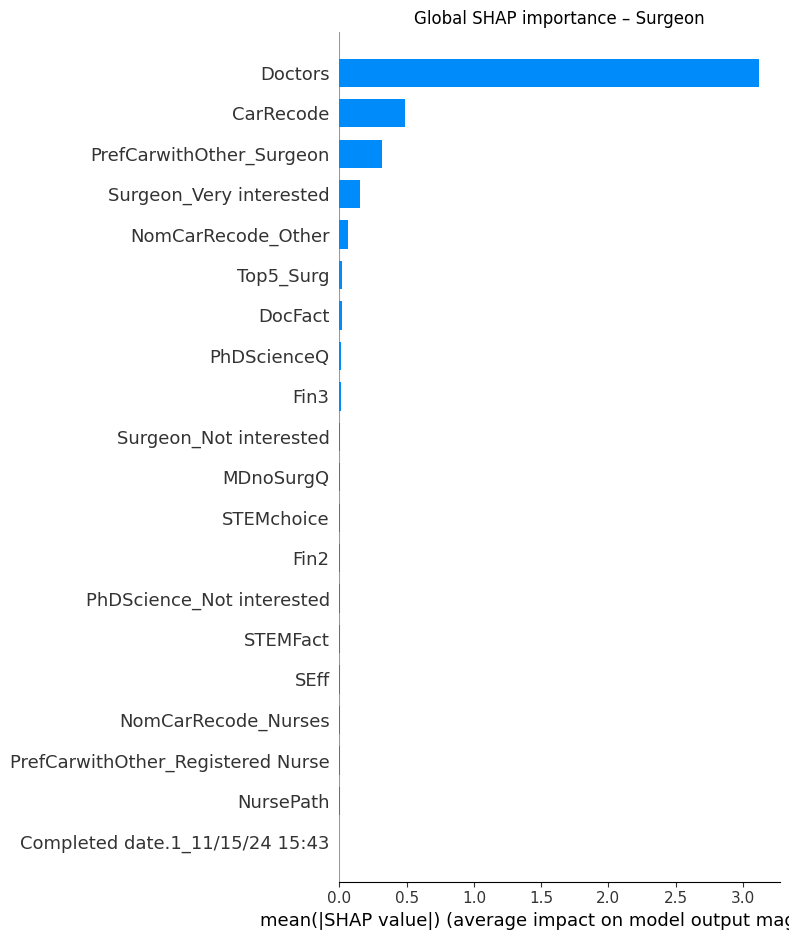

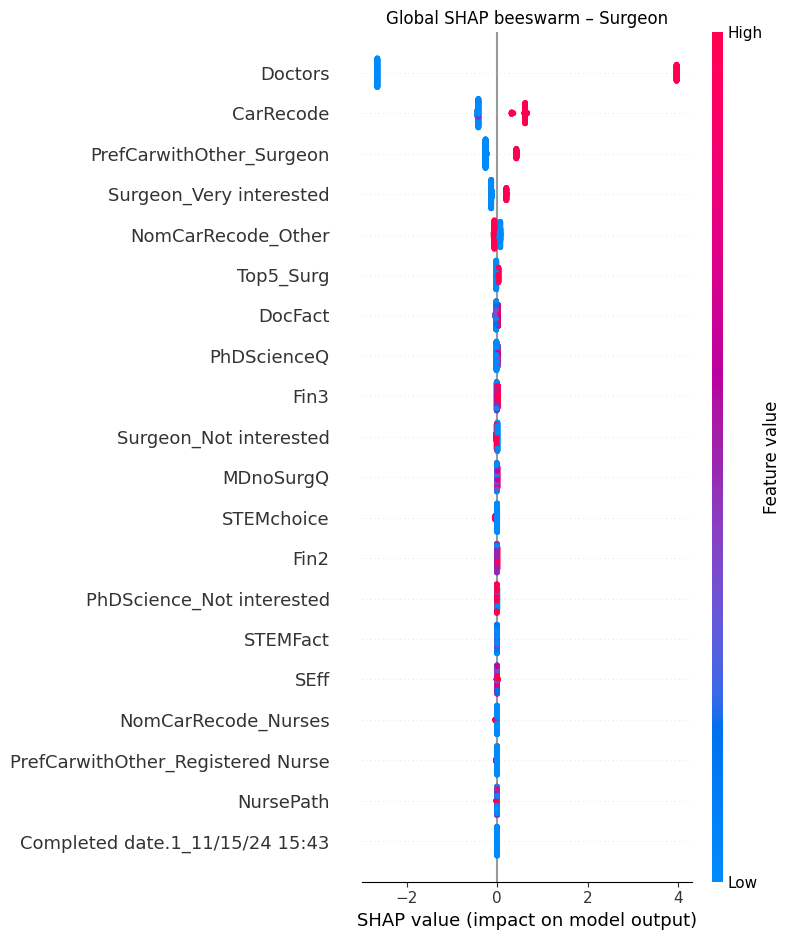


Top 15 features driving choice: Surgeon
                  feature  mean_abs_shap
                  Doctors       3.121377
                CarRecode       0.487100
 PrefCarwithOther_Surgeon       0.313617
  Surgeon_Very interested       0.152896
       NomCarRecode_Other       0.064896
                Top5_Surg       0.021103
                  DocFact       0.017591
              PhDScienceQ       0.014586
                     Fin3       0.008318
   Surgeon_Not interested       0.007561
                MDnoSurgQ       0.006126
               STEMchoice       0.006058
                     Fin2       0.004788
PhDScience_Not interested       0.004636
                 STEMFact       0.002575

[WARN] Career 'Medical Doctor (Non-Surgical)' not found in encoded classes. Skipping.

[WARN] Career 'Advance Practice Nurse' not found in encoded classes. Skipping.


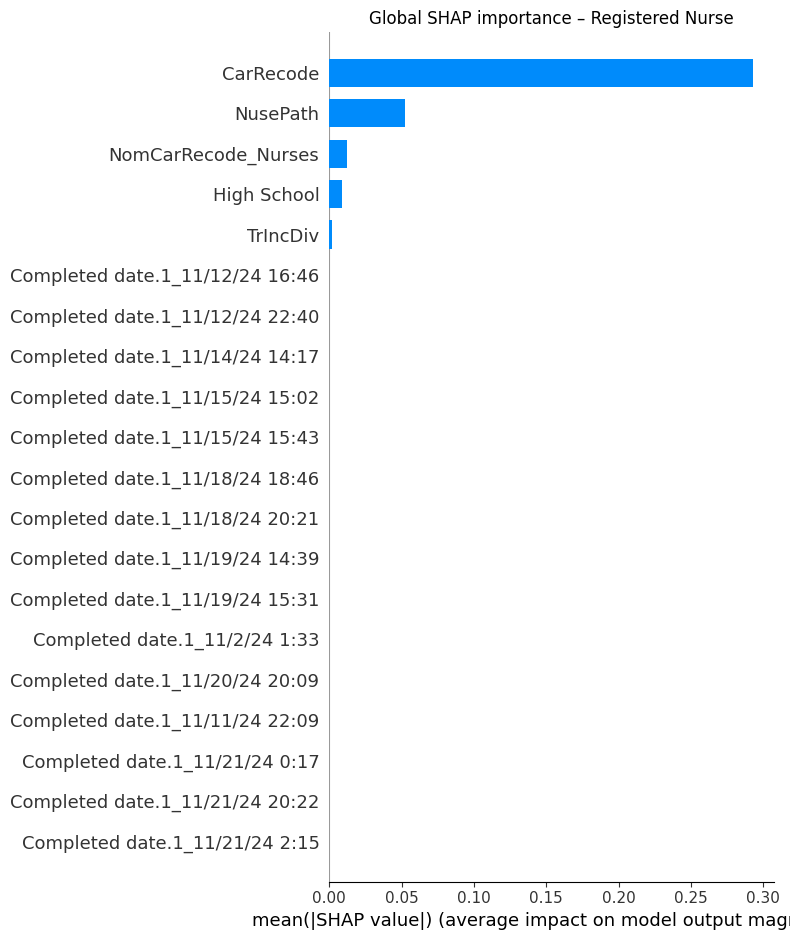

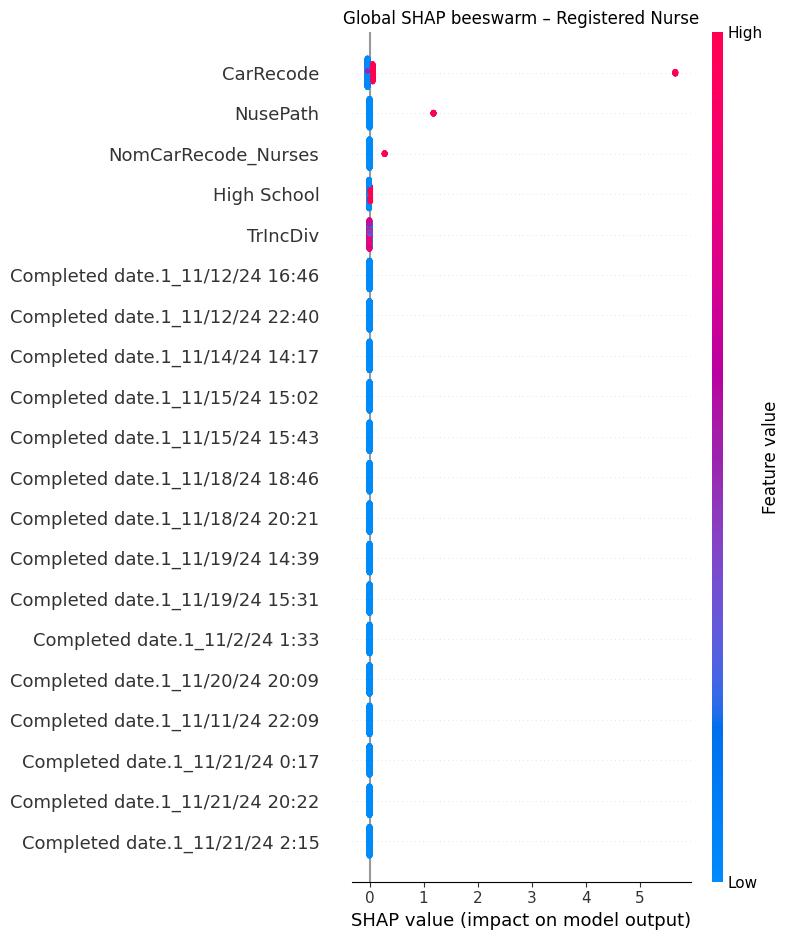


Top 15 features driving choice: Registered Nurse
                   feature  mean_abs_shap
                 CarRecode       0.293159
                  NusePath       0.052473
       NomCarRecode_Nurses       0.012382
               High School       0.008624
                  TrIncDiv       0.001956
     EMTPar_Not interested       0.000000
EMTPar_Never heard of this       0.000000
     Nurse_Very interested       0.000000
 Nurse_Somewhat interested       0.000000
      Nurse_Not interested       0.000000
 Nurse_Never heard of this       0.000000
        PA_Very interested       0.000000
    PA_Somewhat interested       0.000000
         PA_Not interested       0.000000
    PA_Never heard of this       0.000000


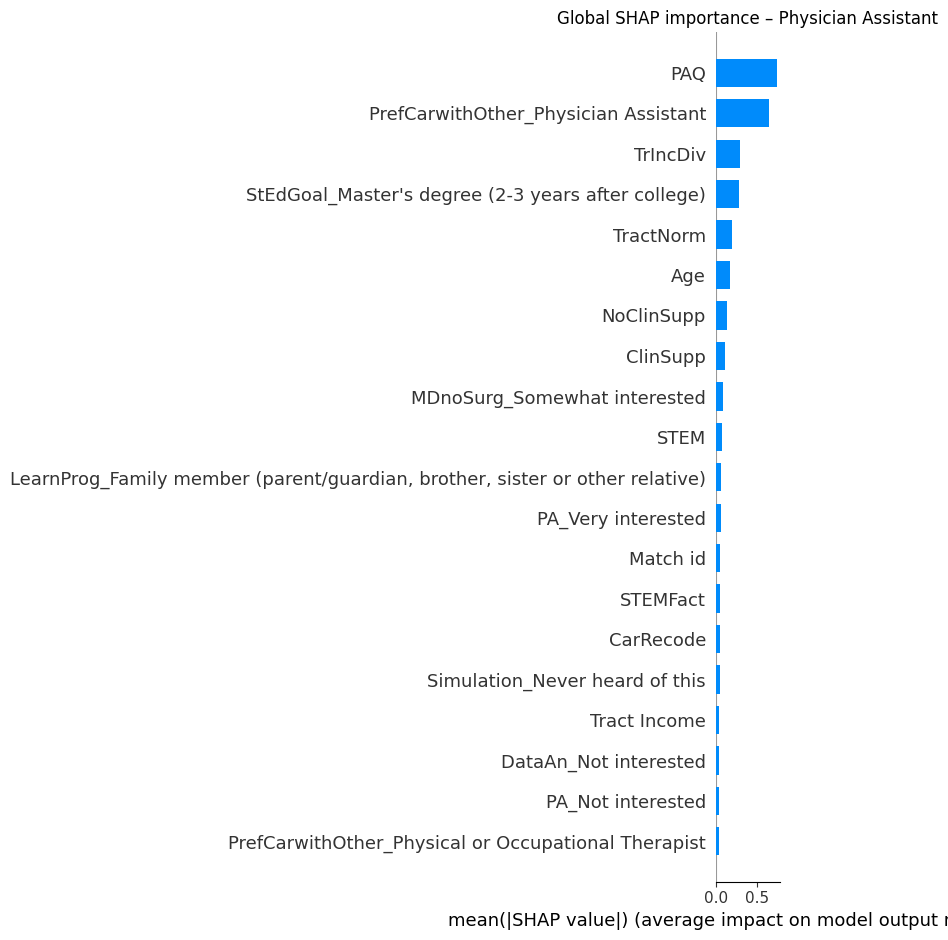

/tmp/ipython-input-1367518749.py:262: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


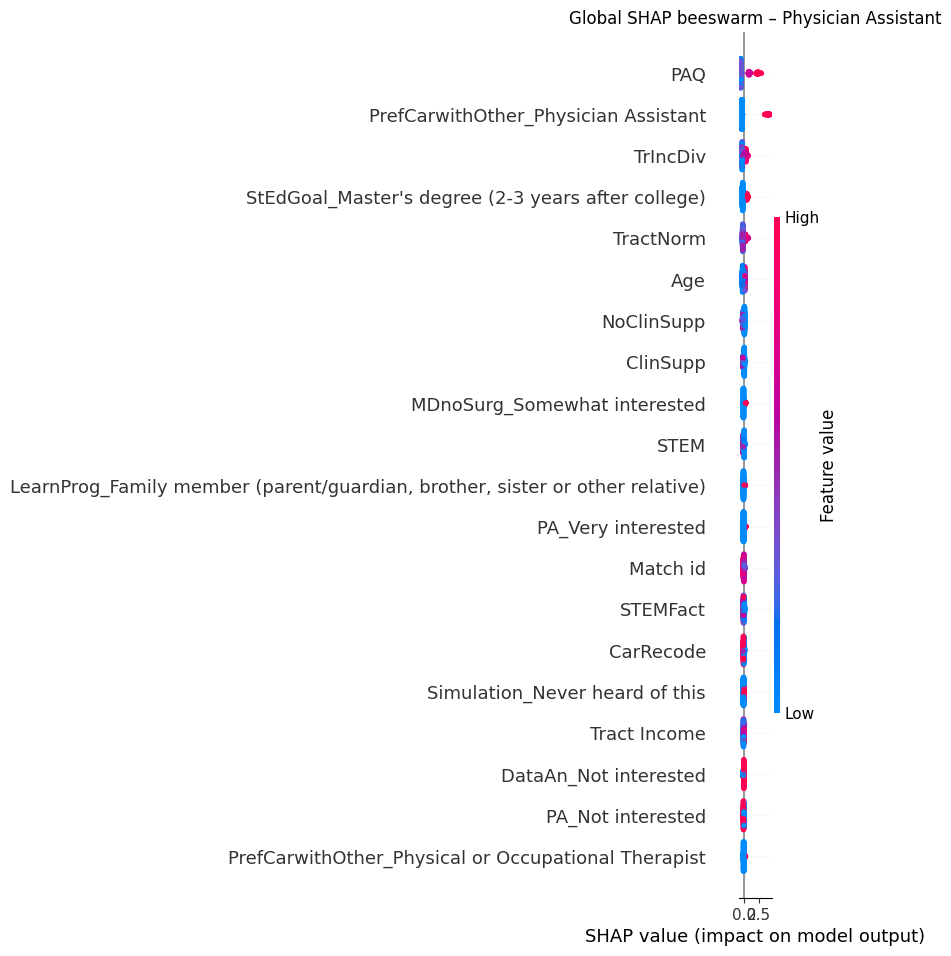


Top 15 features driving choice: Physician Assistant
                                                                     feature  mean_abs_shap
                                                                         PAQ       0.736223
                                        PrefCarwithOther_Physician Assistant       0.638097
                                                                    TrIncDiv       0.294370
                          StEdGoal_Master's degree (2-3 years after college)       0.281366
                                                                   TractNorm       0.195548
                                                                         Age       0.172906
                                                                  NoClinSupp       0.134710
                                                                    ClinSupp       0.108041
                                                MDnoSurg_Somewhat interested       0.087221
                           

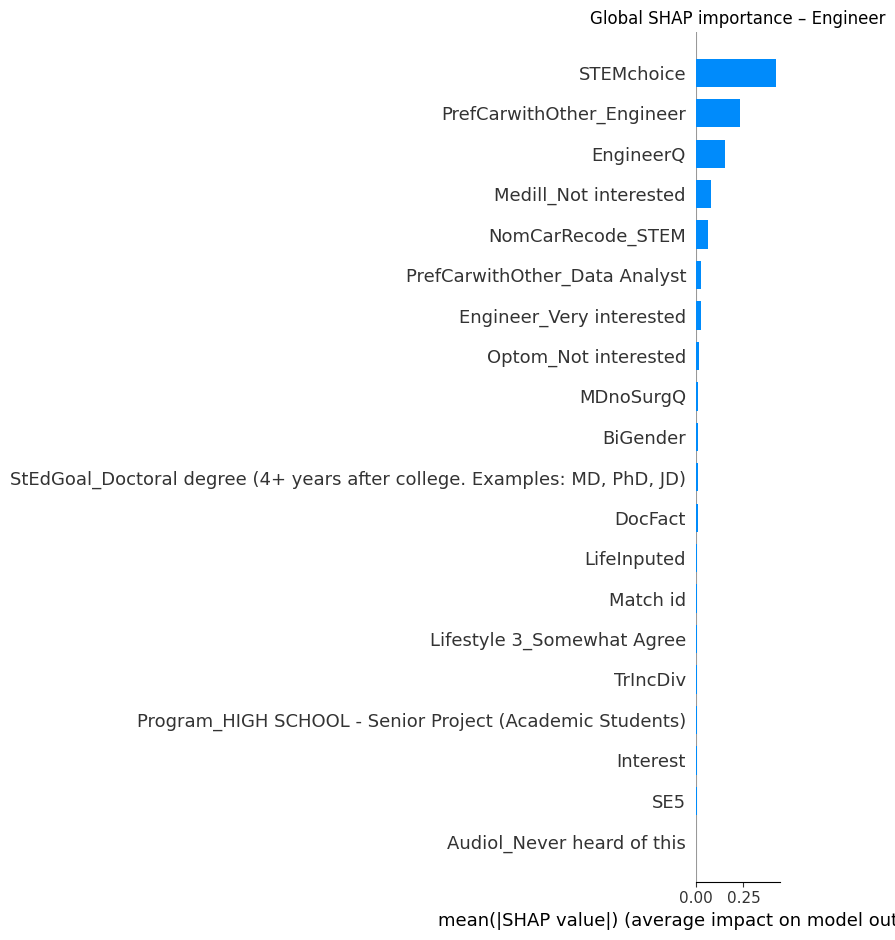

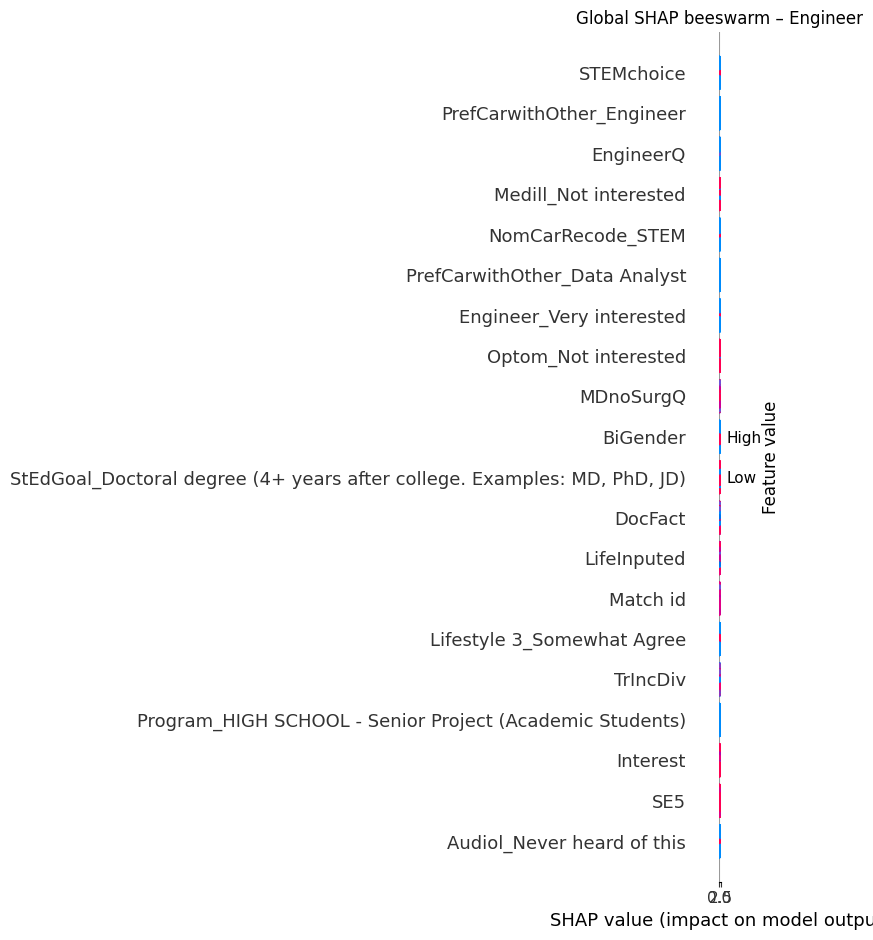


Top 15 features driving choice: Engineer
                                                                 feature  mean_abs_shap
                                                              STEMchoice       0.420872
                                               PrefCarwithOther_Engineer       0.234121
                                                               EngineerQ       0.152041
                                                   Medill_Not interested       0.078242
                                                       NomCarRecode_STEM       0.062743
                                           PrefCarwithOther_Data Analyst       0.029526
                                                Engineer_Very interested       0.026053
                                                    Optom_Not interested       0.016970
                                                               MDnoSurgQ       0.013382
                                                                BiGender      

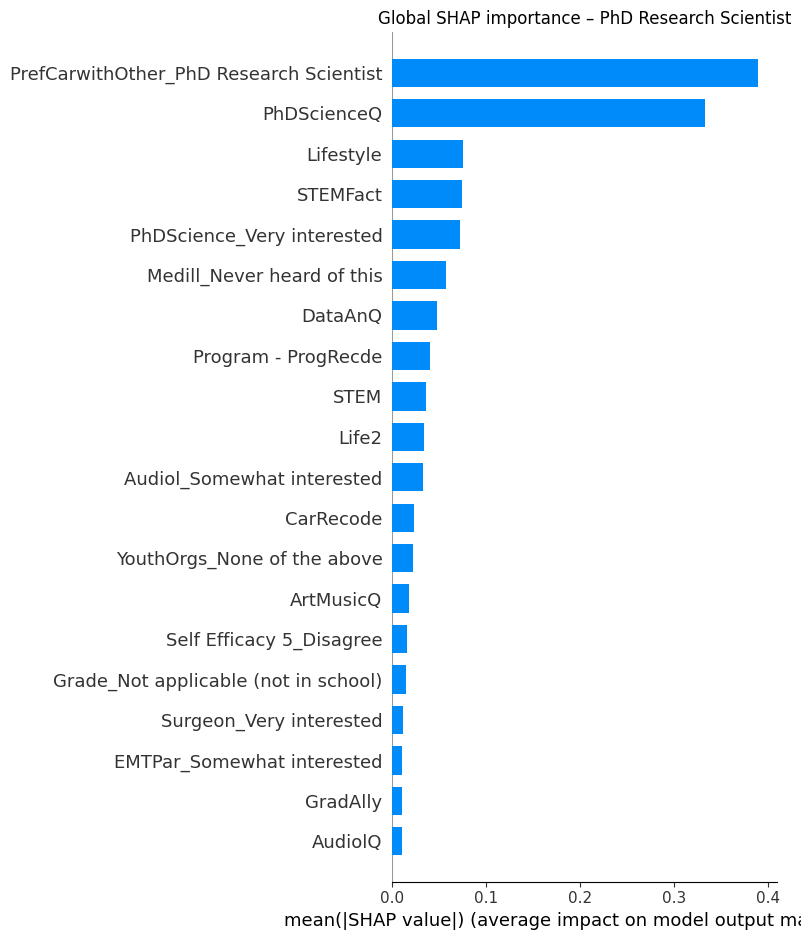

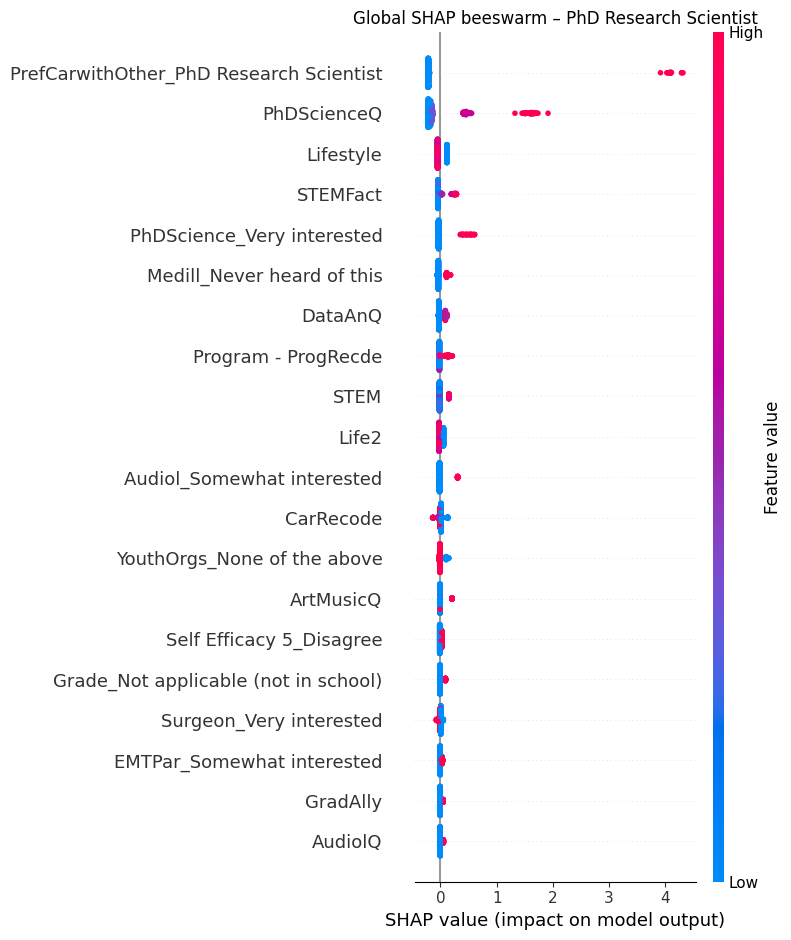


Top 15 features driving choice: PhD Research Scientist
                                feature  mean_abs_shap
PrefCarwithOther_PhD Research Scientist       0.389858
                            PhDScienceQ       0.332908
                              Lifestyle       0.075746
                               STEMFact       0.073990
             PhDScience_Very interested       0.072321
             Medill_Never heard of this       0.057487
                                DataAnQ       0.048020
                    Program - ProgRecde       0.040732
                                   STEM       0.035734
                                  Life2       0.034197
             Audiol_Somewhat interested       0.032408
                              CarRecode       0.023246
            YouthOrgs_None of the above       0.022530
                              ArtMusicQ       0.017615
               Self Efficacy 5_Disagree       0.015445


In [10]:
# ============================================
# 0. Setup: imports & options
# ============================================
# If needed, install dependencies first:
# !pip install shap xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 220)

# ============================================
# 1. Load data
# ============================================
DATA_PATH = "/content/deidentified_july_30.csv"
TARGET_COL = "PrefCareer"

df = pd.read_csv(DATA_PATH)
print("Original shape:", df.shape)

# ============================================
# 2. Restrict to the target careers
# ============================================
target_careers = [
    "Medical Doctor (Non-Surgical)",
    "Surgeon",
    "Advance Practice Nurse",
    "Physical or Occupational Therapist",
    "Imaging Tech (e.g. Ultrasound, Radiology)",
    "Physician Assistant",
    "Cardiovascular Perfusionist",
    "Engineer",
    "PhD Research Scientist",
    "Data Analyst",
    "Registered Nurse",
    "EMT / Paramedic",
    "Hospital Administration",
    "Non-Clinical Support Roles (e.g., Patient Transport, Environmental Services)",
    "Speech Language Pathologist",
    "Certified Anesthesiologist Assistant",
    "Medical Laboratory Positions (e.g. Lab Tech, Cytotechnologist, Medical Laboratory Scientist)",
    "Respiratory Therapist",
    "Marketing Professional",
    "Pharmacist",
    "Dentist",
    "Medical Assistant",
    "Nurse Assistant",
    "Art or Music Therapist",
    "Other",
]

df = df[df[TARGET_COL].isin(target_careers)].copy()
print("Shape after filtering to target careers:", df.shape)

# Quick check of counts
print("\nCareer value counts:")
print(df[TARGET_COL].value_counts())

# ============================================
# 3. Drop leaky / text columns & define X, y
# ============================================
# Columns that directly reveal surgeon / MD or describe career preferences
leak_cols = ["SurgeonQ", "MDnoSurgTop", "SurgTop"]
text_career_cols = [
    "Other Career",
    "WhyCareer",
    "DiffCareer",
    "form 2. Master Pre-Survey 43) Think about the healthcare career that you selecte",
]

cols_to_drop = [TARGET_COL] + [c for c in (leak_cols + text_career_cols) if c in df.columns]
print("\nDropping columns from predictors:", cols_to_drop)

y = df[TARGET_COL].copy()
X = df.drop(columns=cols_to_drop)

print("Predictor matrix initial shape:", X.shape)

# ============================================
# 4. Encode target and features
# ============================================
# ---- target: PrefCareer ----
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

print("\nEncoded career classes (label_encoder.classes_):")
for idx, name in enumerate(label_encoder.classes_):
    print(f"{idx}: {name}")

# ---- features: make everything numeric ----
# (a) treat any non-numeric column as categorical and one-hot encode
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNon-numeric (categorical) feature columns:", len(cat_cols))
if len(cat_cols) > 0:
    print("Example categorical cols:", cat_cols[:10])

X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# (b) force all to numeric float & handle weird entries
X_enc = X_enc.apply(pd.to_numeric, errors="coerce")
X_enc = X_enc.fillna(0.0).astype(float)

print("\nEncoded X shape:", X_enc.shape)
print("Dtype counts in X_enc:")
print(X_enc.dtypes.value_counts())

feature_names = X_enc.columns

# ============================================
# 5. Train / test split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_enc,
    y_enc,
    test_size=0.2,
    stratify=y_enc,
    random_state=42,
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# ============================================
# 6. Fit multi-class XGBoost model
# ============================================
num_classes = len(label_encoder.classes_)

model = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=num_classes,
    eval_metric="mlogloss",
    tree_method="hist",    # change to "gpu_hist" if GPU is available
    random_state=42,
)

model.fit(X_train, y_train)

# Optional: quick sanity check on accuracy
train_acc = (model.predict(X_train) == y_train).mean()
test_acc = (model.predict(X_test) == y_test).mean()
print(f"\nTrain accuracy: {train_acc:.3f}")
print(f"Test accuracy : {test_acc:.3f}")

# ============================================
# 7. Build SHAP explainer (numeric data only)
# ============================================
shap.initjs()

# Use a subset of training data as background for speed
if X_train.shape[0] > 2000:
    background = shap.sample(X_train, 2000, random_state=42)
else:
    background = X_train

explainer = shap.TreeExplainer(model, data=background)

# shap_values can be:
#  - list of length num_classes: each (n_samples, n_features)
#  - array of shape (n_samples, n_features, num_classes)
shap_values_raw = explainer.shap_values(X_train)

def get_shap_for_class(shap_values, class_idx):
    """
    Normalize SHAP output shape to (n_samples, n_features) for a given class.
    Handles both list and 3D array formats.
    """
    if isinstance(shap_values, list):
        # classic multi-class output: list[num_classes] of (n_samples, n_features)
        return shap_values[class_idx]
    elif isinstance(shap_values, np.ndarray):
        if shap_values.ndim == 3:
            # shape: (n_samples, n_features, num_classes)
            return shap_values[:, :, class_idx]
        elif shap_values.ndim == 2:
            # shape: (n_samples, n_features) – then we can't split by class
            raise ValueError(
                "SHAP returned a 2D array; cannot separate by class index. "
                "Check SHAP version / model settings."
            )
        else:
            raise ValueError(f"Unexpected SHAP array shape: {shap_values.shape}")
    else:
        raise TypeError("Unsupported SHAP values format")

# Precompute per-class shap matrices
shap_values_by_class = [
    get_shap_for_class(shap_values_raw, k) for k in range(num_classes)
]

# ============================================
# 8. Helper: top SHAP features (global) for a career
# ============================================
def show_top_features_for_class(class_index, top_k=20):
    """
    Print top features by mean absolute SHAP value for the given class.
    """
    shap_mat = shap_values_by_class[class_index]     # (n_samples, n_features)
    mean_abs = np.abs(shap_mat).mean(axis=0)
    importance_df = pd.DataFrame({
        "feature": feature_names,
        "mean_abs_shap": mean_abs
    }).sort_values("mean_abs_shap", ascending=False)

    career_name = label_encoder.classes_[class_index]
    print(f"\nTop {top_k} features driving choice: {career_name}")
    print(importance_df.head(top_k).to_string(index=False))

# ============================================
# 9. Global SHAP summary plots for selected careers
# ============================================
# You can edit this list to include any subset
careers_of_interest = [
    "Surgeon",
    "Medical Doctor (Non-Surgical)",
    "Advance Practice Nurse",
    "Registered Nurse",
    "Physician Assistant",
    "Engineer",
    "PhD Research Scientist",
]

for career in careers_of_interest:
    if career not in label_encoder.classes_:
        print(f"\n[WARN] Career '{career}' not found in encoded classes. Skipping.")
        continue

    class_idx = np.where(label_encoder.classes_ == career)[0][0]
    shap_mat = shap_values_by_class[class_idx]

    # ---- (a) bar plot: global importance ----
    shap.summary_plot(
        shap_mat,
        X_train,
        feature_names=feature_names,
        plot_type="bar",
        max_display=20,
        show=False,
    )
    plt.title(f"Global SHAP importance – {career}")
    plt.tight_layout()
    plt.show()

    # ---- (b) beeswarm plot: magnitude + direction ----
    shap.summary_plot(
        shap_mat,
        X_train,
        feature_names=feature_names,
        max_display=20,
        show=False,
    )
    plt.title(f"Global SHAP beeswarm – {career}")
    plt.tight_layout()
    plt.show()

    # ---- (c) top features printed ----
    show_top_features_for_class(class_idx, top_k=15)

# ============================================
# 10. (Optional) Loop over ALL careers and save plots
# ============================================
save_all = False  # set True if you want PNG files for every career

if save_all:
    for class_idx, career in enumerate(label_encoder.classes_):
        shap_mat = shap_values_by_class[class_idx]

        # Bar summary plot
        shap.summary_plot(
            shap_mat,
            X_train,
            feature_names=feature_names,
            plot_type="bar",
            max_display=15,
            show=False,
        )
        plt.title(f"Global SHAP importance – {career}")
        plt.tight_layout()

        safe_name = (
            career.replace(" ", "_")
                  .replace("/", "_")
                  .replace("(", "")
                  .replace(")", "")
                  .replace(",", "")
        )
        plt.savefig(f"shap_importance_{safe_name}.png", dpi=150)
        plt.close()

        # Beeswarm plot
        shap.summary_plot(
            shap_mat,
            X_train,
            feature_names=feature_names,
            max_display=15,
            show=False,
        )
        plt.title(f"Global SHAP beeswarm – {career}")
        plt.tight_layout()
        plt.savefig(f"shap_beeswarm_{safe_name}.png", dpi=150)
        plt.close()

        print(f"Saved SHAP plots for: {career}")


Original shape: (1236, 197)
Shape after filtering to target careers: (620, 197)

Career value counts:
PrefCareer
Surgeon                               224
Physical or Occupational Therapist     74
Physician Assistant                    68
Cardiovascular Perfusionist            39
Registered Nurse                       28
Engineer                               28
PhD Research Scientist                 27
Data Analyst                           26
EMT / Paramedic                        26
Hospital Administration                22
Respiratory Therapist                  11
Marketing Professional                 10
Art or Music Therapist                  9
Medical Assistant                       8
Speech Language Pathologist             8
Dentist                                 6
Nurse Assistant                         6
Name: count, dtype: int64

Dropping columns from predictors (if present):
['PrefCareer', 'SurgeonQ', 'MDnoSurgTop', 'SurgTop', 'APRNTop', 'PTorOTTop', 'ImageTop', 'PATop', '

100%|===================| 8423/8432 [10:30<00:00]       

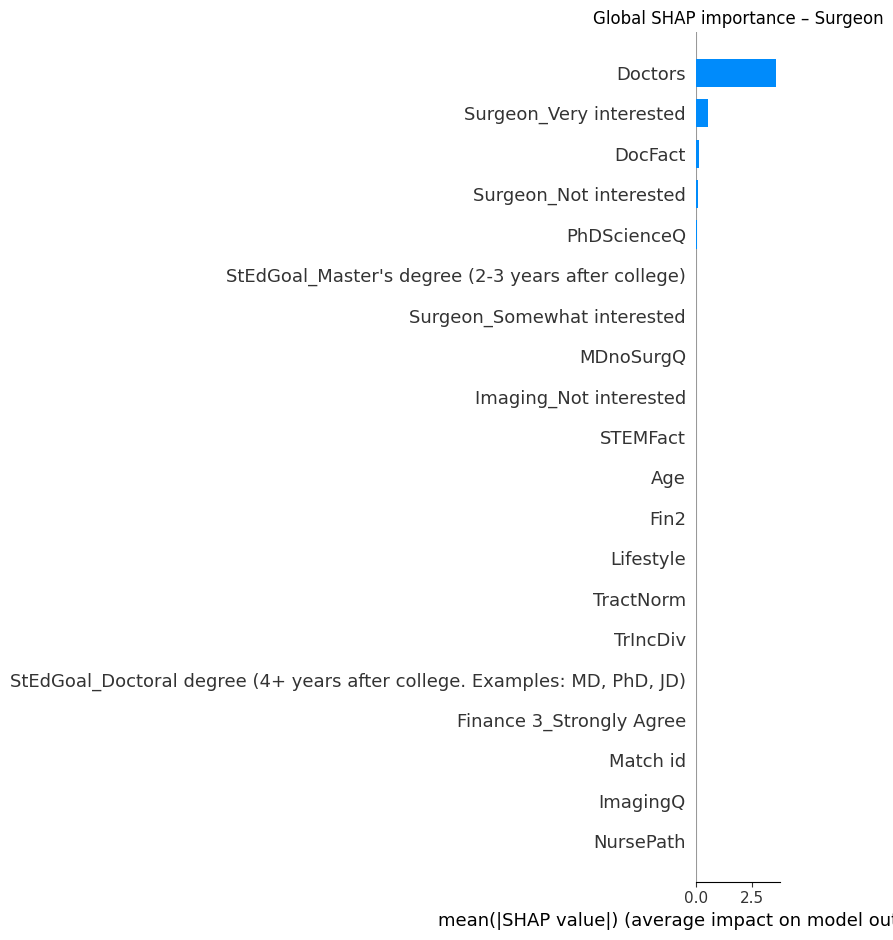

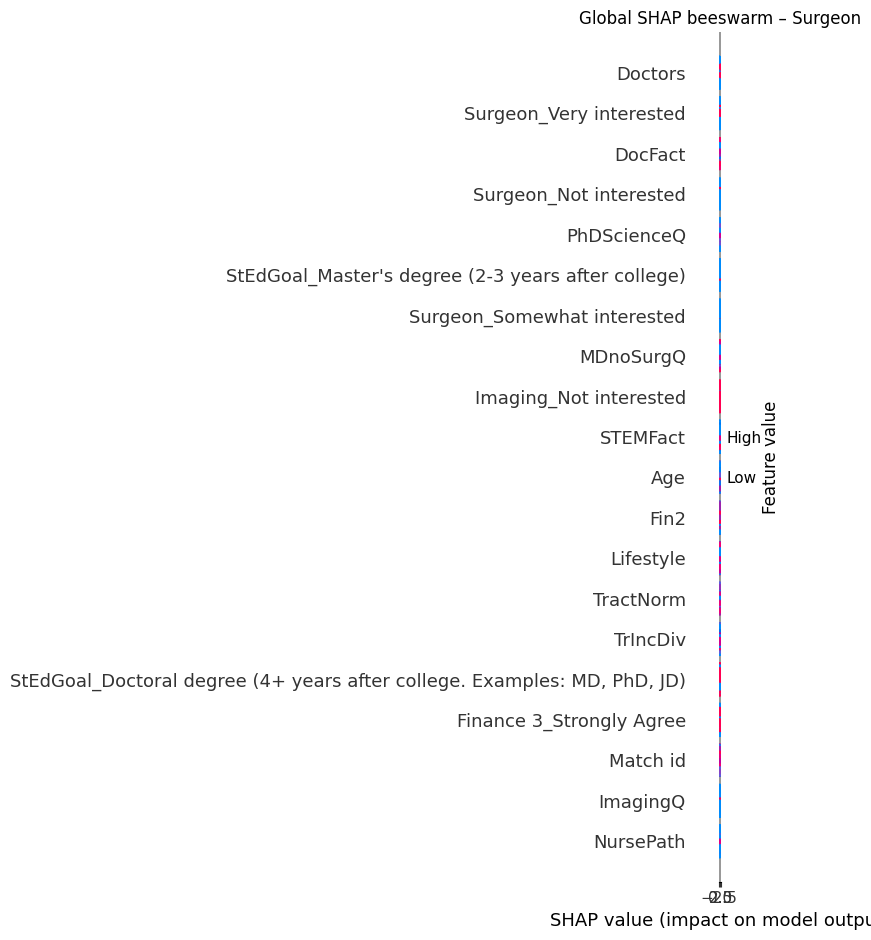


Top 15 features driving choice: Surgeon
                                           feature  mean_abs_shap
                                           Doctors       3.594046
                           Surgeon_Very interested       0.547523
                                           DocFact       0.167333
                            Surgeon_Not interested       0.112486
                                       PhDScienceQ       0.038998
StEdGoal_Master's degree (2-3 years after college)       0.029649
                       Surgeon_Somewhat interested       0.016159
                                         MDnoSurgQ       0.014333
                            Imaging_Not interested       0.012277
                                          STEMFact       0.007913
                                               Age       0.006322
                                              Fin2       0.005774
                                         Lifestyle       0.005459
                                   

/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipython-input-925795890.py:284: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


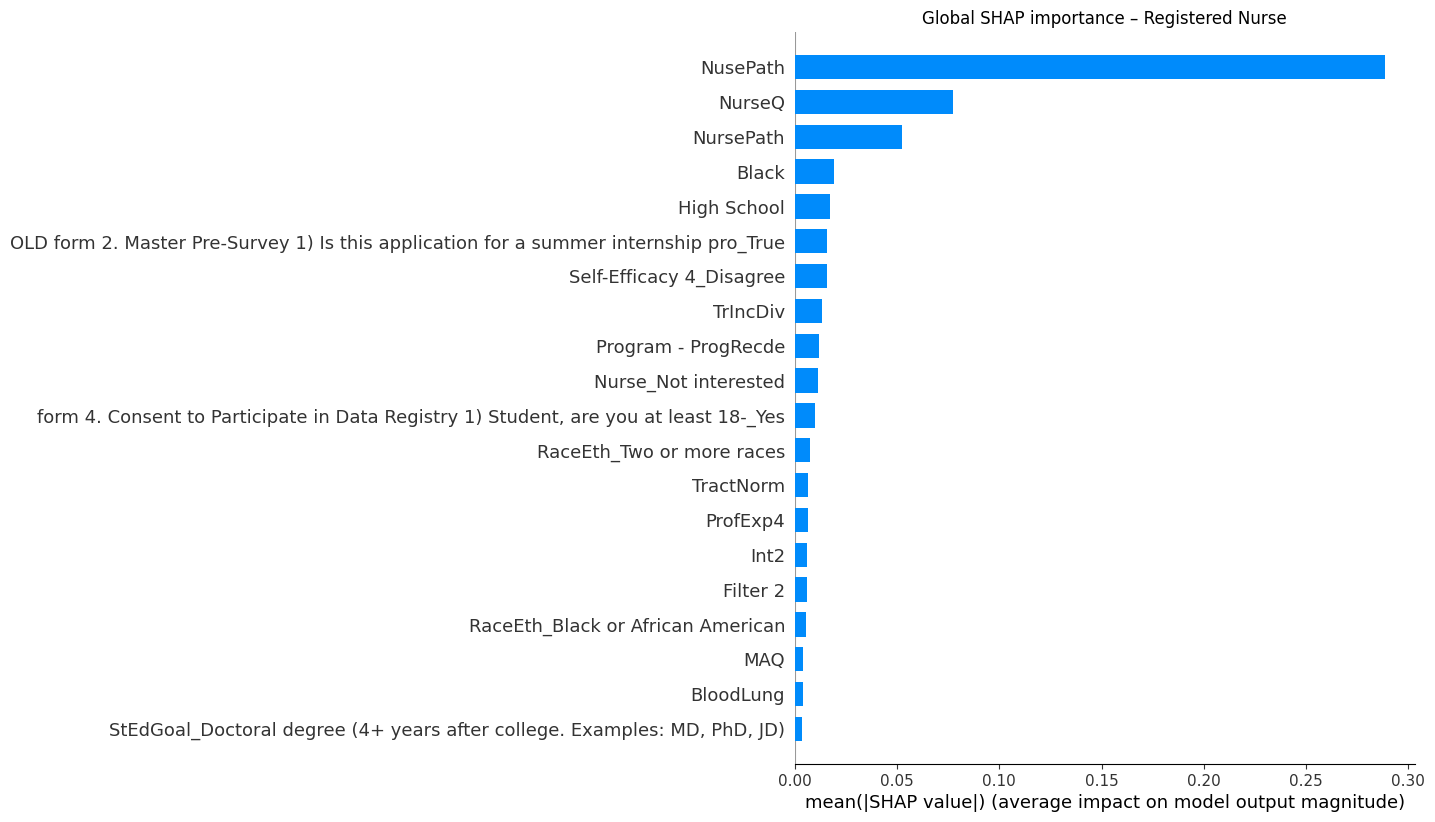

/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipython-input-925795890.py:296: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


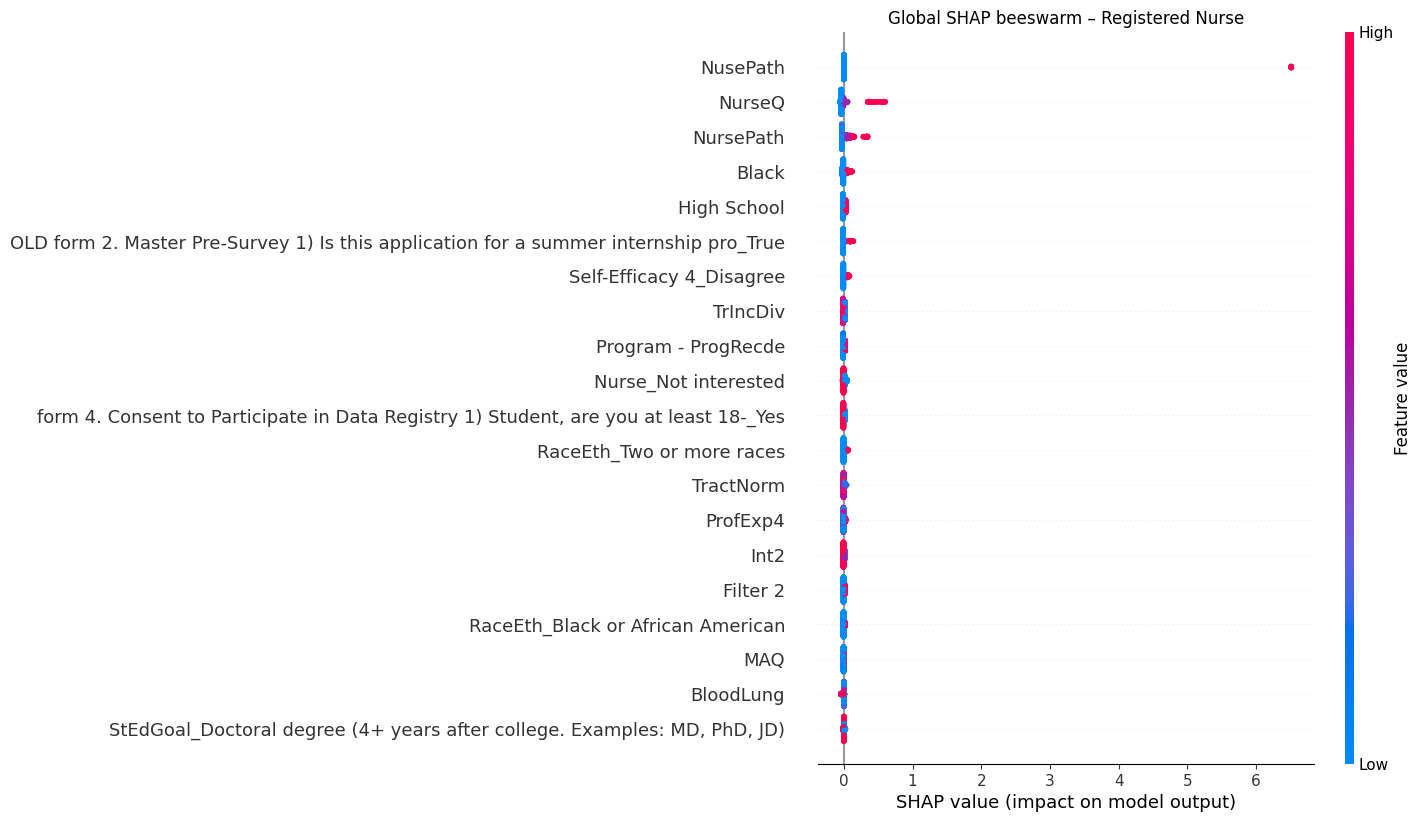


Top 15 features driving choice: Registered Nurse
                                                                              feature  mean_abs_shap
                                                                             NusePath       0.288818
                                                                               NurseQ       0.077290
                                                                            NursePath       0.052655
                                                                                Black       0.019036
                                                                          High School       0.017282
OLD form 2. Master Pre-Survey 1) Is this application for a summer internship pro_True       0.015629
                                                             Self-Efficacy 4_Disagree       0.015503
                                                                             TrIncDiv       0.013326
                                         

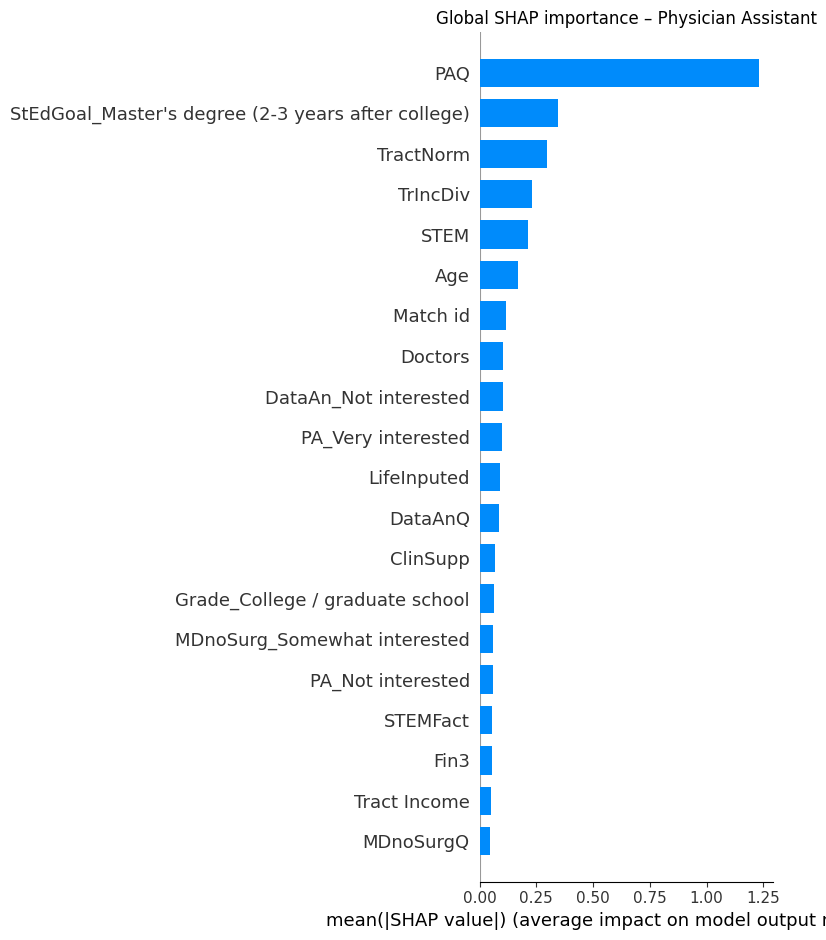

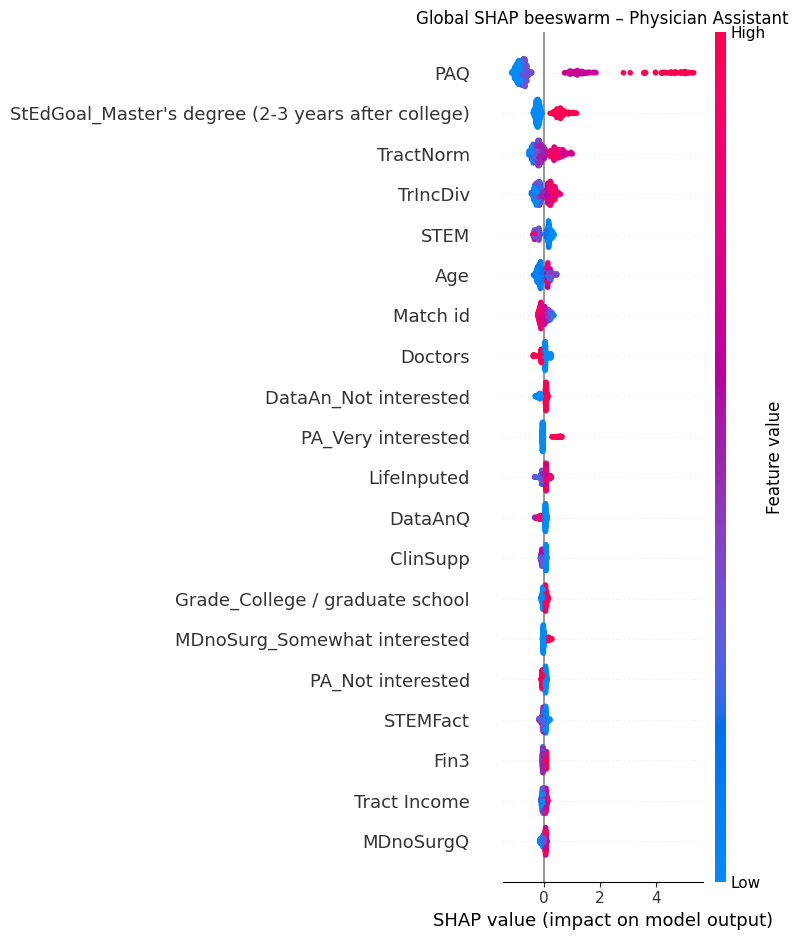


Top 15 features driving choice: Physician Assistant
                                           feature  mean_abs_shap
                                               PAQ       1.231107
StEdGoal_Master's degree (2-3 years after college)       0.343980
                                         TractNorm       0.298335
                                          TrIncDiv       0.230561
                                              STEM       0.214370
                                               Age       0.170820
                                          Match id       0.116412
                                           Doctors       0.103620
                             DataAn_Not interested       0.102442
                                PA_Very interested       0.097635
                                       LifeInputed       0.088459
                                           DataAnQ       0.085518
                                          ClinSupp       0.069222
                   Grad

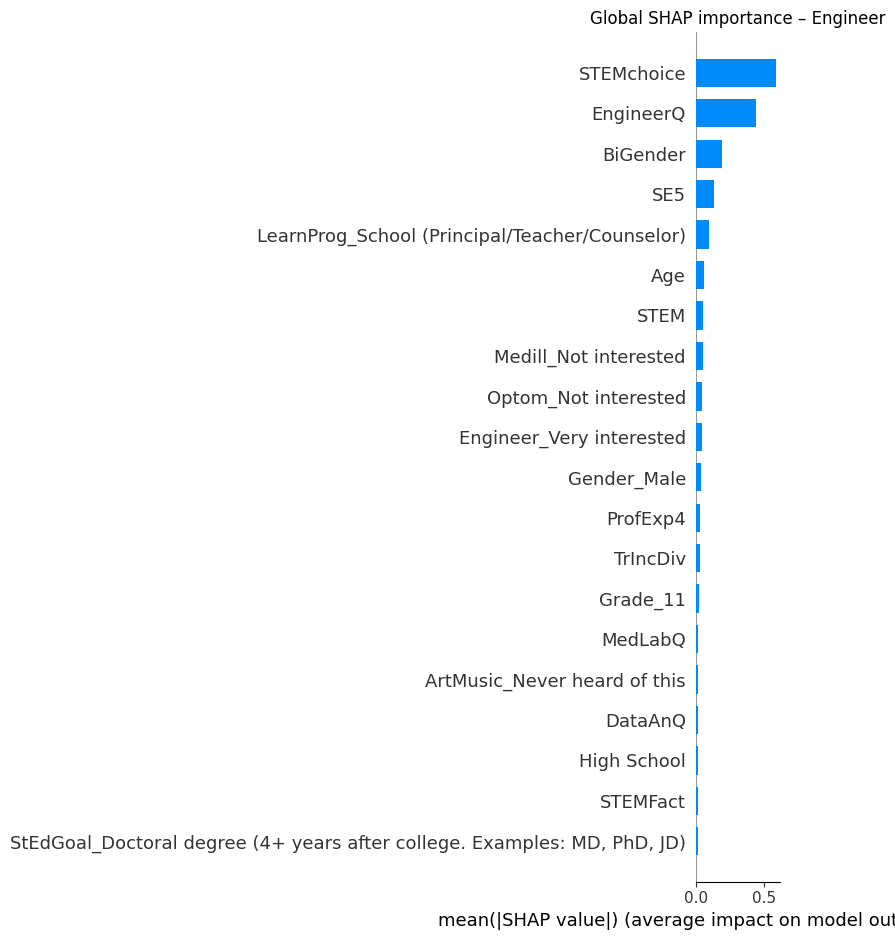

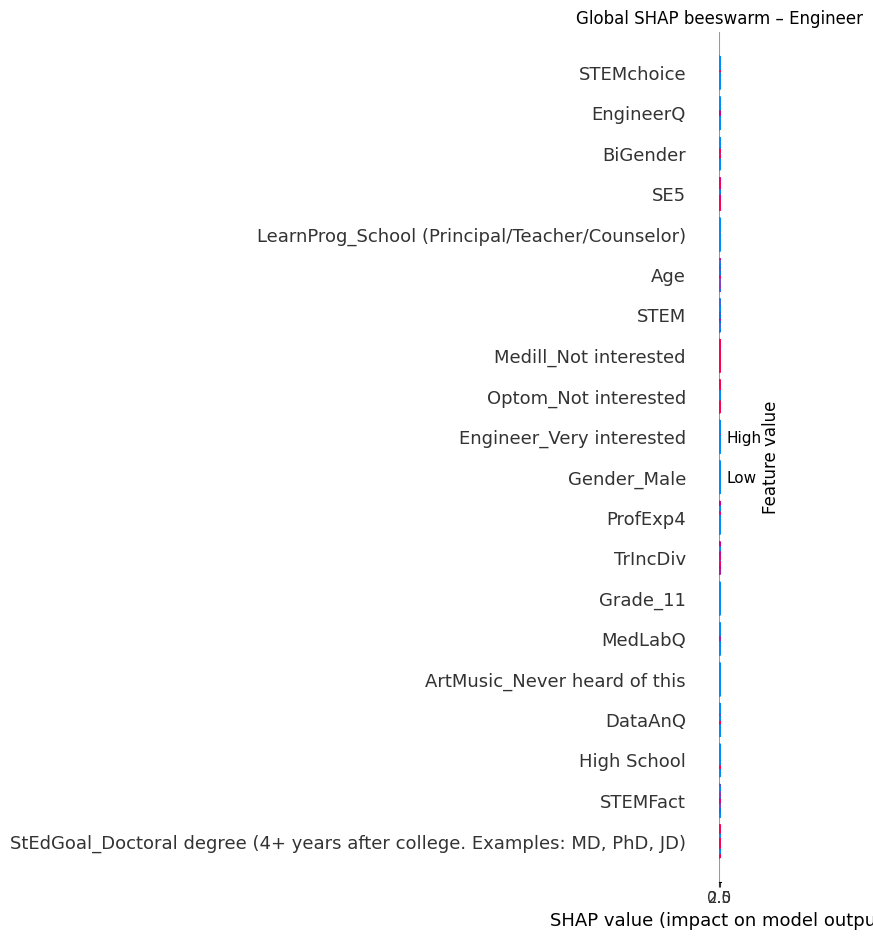


Top 15 features driving choice: Engineer
                                       feature  mean_abs_shap
                                    STEMchoice       0.588705
                                     EngineerQ       0.440231
                                      BiGender       0.194197
                                           SE5       0.134058
LearnProg_School (Principal/Teacher/Counselor)       0.099240
                                           Age       0.061468
                                          STEM       0.056480
                         Medill_Not interested       0.055644
                          Optom_Not interested       0.044977
                      Engineer_Very interested       0.043263
                                   Gender_Male       0.040818
                                      ProfExp4       0.031980
                                      TrIncDiv       0.028771
                                      Grade_11       0.020570
                            

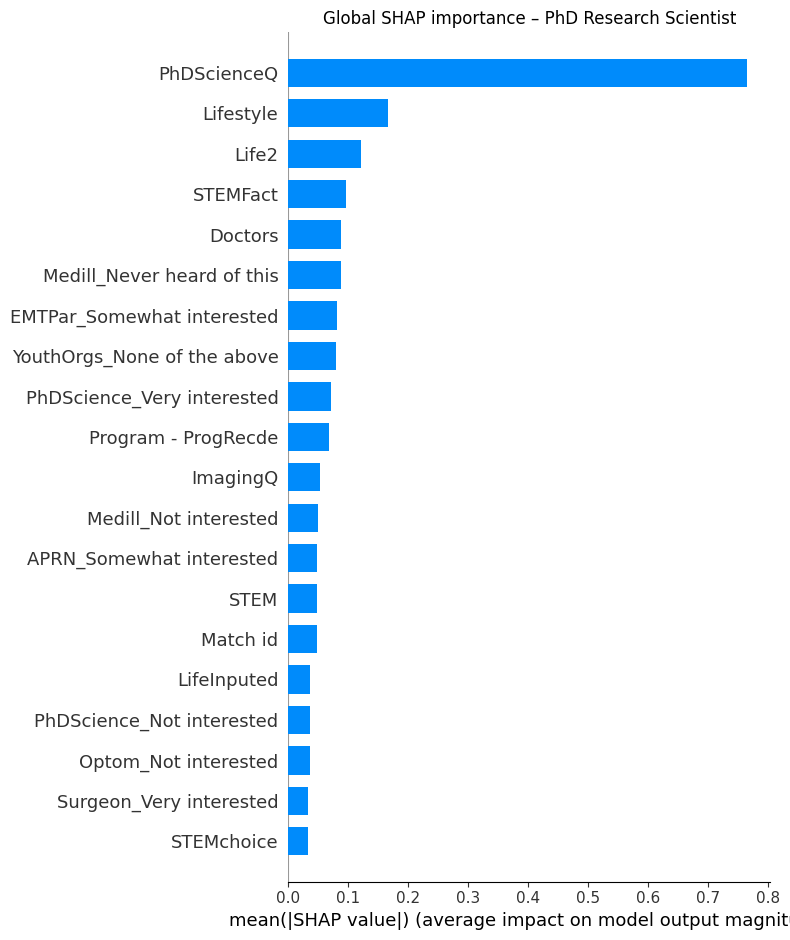

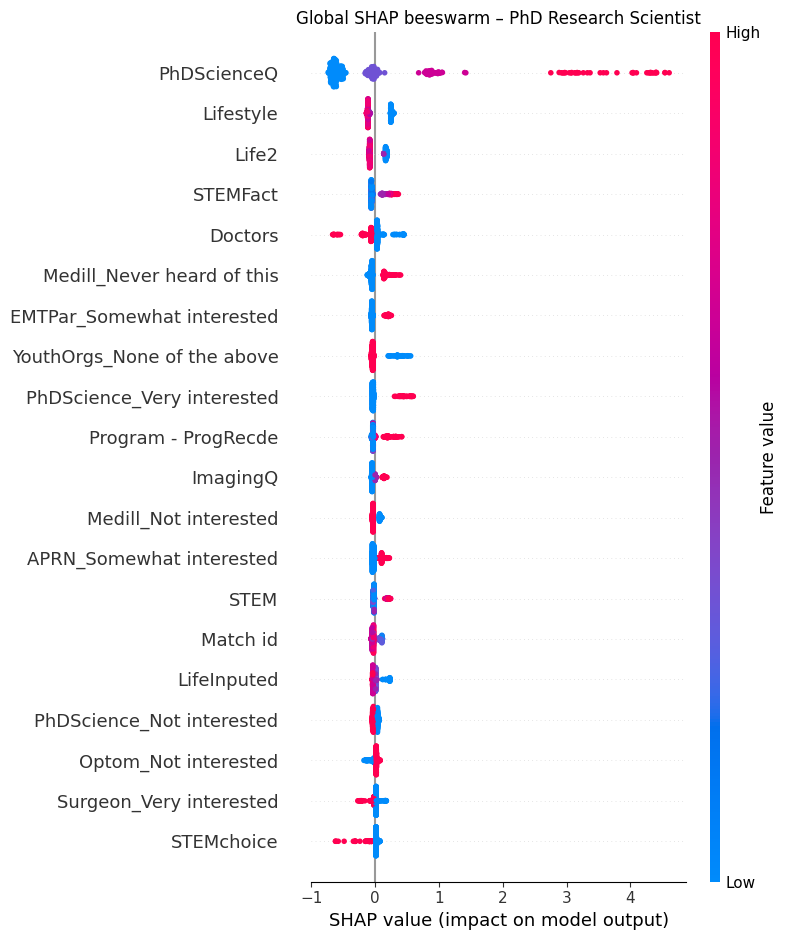


Top 15 features driving choice: PhD Research Scientist
                    feature  mean_abs_shap
                PhDScienceQ       0.765426
                  Lifestyle       0.165589
                      Life2       0.122055
                   STEMFact       0.095541
                    Doctors       0.088154
 Medill_Never heard of this       0.087250
 EMTPar_Somewhat interested       0.082052
YouthOrgs_None of the above       0.079518
 PhDScience_Very interested       0.070736
        Program - ProgRecde       0.067953
                   ImagingQ       0.053584
      Medill_Not interested       0.050179
   APRN_Somewhat interested       0.047877
                       STEM       0.047475
                   Match id       0.047192


In [11]:
# ============================================
# 0. Setup: imports & options
# ============================================
# If needed, install dependencies first:
# !pip install shap xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 220)

# ============================================
# 1. Load data
# ============================================
DATA_PATH = "/content/deidentified_july_30.csv"
TARGET_COL = "PrefCareer"

df = pd.read_csv(DATA_PATH)
print("Original shape:", df.shape)

# ============================================
# 2. Restrict to the target careers
# ============================================
target_careers = [
    "Medical Doctor (Non-Surgical)",
    "Surgeon",
    "Advance Practice Nurse",
    "Physical or Occupational Therapist",
    "Imaging Tech (e.g. Ultrasound, Radiology)",
    "Physician Assistant",
    "Cardiovascular Perfusionist",
    "Engineer",
    "PhD Research Scientist",
    "Data Analyst",
    "Registered Nurse",
    "EMT / Paramedic",
    "Hospital Administration",
    "Non-Clinical Support Roles (e.g., Patient Transport, Environmental Services)",
    "Speech Language Pathologist",
    "Certified Anesthesiologist Assistant",
    "Medical Laboratory Positions (e.g. Lab Tech, Cytotechnologist, Medical Laboratory Scientist)",
    "Respiratory Therapist",
    "Marketing Professional",
    "Pharmacist",
    "Dentist",
    "Medical Assistant",
    "Nurse Assistant",
    "Art or Music Therapist",
    "Other",
]

df = df[df[TARGET_COL].isin(target_careers)].copy()
print("Shape after filtering to target careers:", df.shape)

# Quick check of counts
print("\nCareer value counts:")
print(df[TARGET_COL].value_counts())

# ============================================
# 3. Drop leaky / text columns & define X, y
# ============================================
# Columns that directly encode or recode the outcome (leakage)
leak_cols = [
    # Q / Top variables you had already identified
    "SurgeonQ", "MDnoSurgTop", "SurgTop",
    # All *Top career-rank indicators (strongly target-like)
    "APRNTop", "PTorOTTop", "ImageTop", "PATop", "PerfusTop",
    # Direct recodes of PrefCareer / combined career answers
    "CarRecode", "NomCarRecode", "PrefCarwithOther", "Top5",
]

# Textual description columns for careers – we don’t want the free text
text_career_cols = [
    "Other Career",
    "WhyCareer",
    "DiffCareer",
    "form 2. Master Pre-Survey 43) Think about the healthcare career that you selecte",
]

# Keep only those that exist in the frame
cols_to_drop = [TARGET_COL] + [c for c in (leak_cols + text_career_cols) if c in df.columns]

print("\nDropping columns from predictors (if present):")
print(cols_to_drop)

y = df[TARGET_COL].copy()
X = df.drop(columns=cols_to_drop, errors="ignore")

print("\nPredictor matrix initial shape:", X.shape)

# ============================================
# 4. Encode target and features
# ============================================
# ---- target: PrefCareer ----
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

print("\nEncoded career classes (label_encoder.classes_):")
for idx, name in enumerate(label_encoder.classes_):
    print(f"{idx}: {repr(name)}")

# ---- features: make everything numeric ----
# (a) treat any non-numeric column as categorical and one-hot encode
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNon-numeric (categorical) feature columns:", len(cat_cols))
if len(cat_cols) > 0:
    print("Example categorical cols:", cat_cols[:10])

X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# (b) force all to numeric float & handle weird entries
X_enc = X_enc.apply(pd.to_numeric, errors="coerce")
X_enc = X_enc.fillna(0.0).astype(float)

print("\nEncoded X shape:", X_enc.shape)
print("Dtype counts in X_enc:")
print(X_enc.dtypes.value_counts())

feature_names = X_enc.columns

# ============================================
# 5. Train / test split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_enc,
    y_enc,
    test_size=0.2,
    stratify=y_enc,
    random_state=42,
)

print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# ============================================
# 6. Fit multi-class XGBoost model
# ============================================
num_classes = len(label_encoder.classes_)

model = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=num_classes,
    eval_metric="mlogloss",
    tree_method="hist",    # change to "gpu_hist" if GPU is available
    random_state=42,
)

model.fit(X_train, y_train)

# Optional: quick sanity check on accuracy
train_acc = (model.predict(X_train) == y_train).mean()
test_acc = (model.predict(X_test) == y_test).mean()
print(f"\nTrain accuracy: {train_acc:.3f}")
print(f"Test accuracy : {test_acc:.3f}")

# ============================================
# 7. Build SHAP explainer (numeric data only)
# ============================================
shap.initjs()

# Use a subset of training data as background for speed
if X_train.shape[0] > 2000:
    background = X_train.sample(n=2000, random_state=42)
else:
    background = X_train

explainer = shap.TreeExplainer(model, data=background)

# shap_values can be:
#  - list of length num_classes: each (n_samples, n_features)
#  - array of shape (n_samples, n_features, num_classes)
shap_values_raw = explainer.shap_values(X_train)

def get_shap_for_class(shap_values, class_idx):
    """
    Normalize SHAP output shape to (n_samples, n_features) for a given class.
    Handles both list and 3D array formats.
    """
    if isinstance(shap_values, list):
        # classic multi-class output: list[num_classes] of (n_samples, n_features)
        return shap_values[class_idx]
    elif isinstance(shap_values, np.ndarray):
        if shap_values.ndim == 3:
            # shape: (n_samples, n_features, num_classes)
            return shap_values[:, :, class_idx]
        elif shap_values.ndim == 2:
            # shape: (n_samples, n_features) – then we can't split by class
            raise ValueError(
                "SHAP returned a 2D array; cannot separate by class index. "
                "Check SHAP version / model settings."
            )
        else:
            raise ValueError(f"Unexpected SHAP array shape: {shap_values.shape}")
    else:
        raise TypeError("Unsupported SHAP values format")

# Precompute per-class shap matrices
shap_values_by_class = [
    get_shap_for_class(shap_values_raw, k) for k in range(num_classes)
]

# ============================================
# 8. Helper: top SHAP features (global) for a career
# ============================================
def show_top_features_for_class(class_index, top_k=20):
    """
    Print top features by mean absolute SHAP value for the given class.
    """
    shap_mat = shap_values_by_class[class_index]     # (n_samples, n_features)
    mean_abs = np.abs(shap_mat).mean(axis=0)
    importance_df = pd.DataFrame({
        "feature": feature_names,
        "mean_abs_shap": mean_abs
    }).sort_values("mean_abs_shap", ascending=False)

    career_name = label_encoder.classes_[class_index]
    print(f"\nTop {top_k} features driving choice: {career_name}")
    print(importance_df.head(top_k).to_string(index=False))

# Helper to resolve slight label mismatches (e.g. dash/case issues)
def resolve_career_label(requested_name):
    """
    Try to map a requested career label (possibly approximate) to
    an actual label in label_encoder.classes_.
    """
    classes = list(label_encoder.classes_)
    # exact match
    if requested_name in classes:
        return requested_name

    # case-insensitive substring search
    candidates = [c for c in classes if requested_name.lower() in c.lower()]
    if len(candidates) == 1:
        print(f"[INFO] Using '{candidates[0]}' for requested '{requested_name}'.")
        return candidates[0]
    elif len(candidates) > 1:
        print(f"[WARN] Multiple matches for '{requested_name}': {candidates}. Skipping.")
        return None
    else:
        print(f"[WARN] Career '{requested_name}' not found in encoded classes. Skipping.")
        return None

# ============================================
# 9. Global SHAP summary plots for selected careers
# ============================================
careers_of_interest = [
    "Surgeon",
    "Medical Doctor (Non-Surgical)",
    "Advance Practice Nurse",
    "Registered Nurse",
    "Physician Assistant",
    "Engineer",
    "PhD Research Scientist",
]

for requested in careers_of_interest:
    resolved = resolve_career_label(requested)
    if resolved is None:
        continue

    class_idx = np.where(label_encoder.classes_ == resolved)[0][0]
    shap_mat = shap_values_by_class[class_idx]

    # ---- (a) bar plot: global importance ----
    shap.summary_plot(
        shap_mat,
        X_train,
        feature_names=feature_names,
        plot_type="bar",
        max_display=20,
        show=False,
    )
    plt.title(f"Global SHAP importance – {resolved}")
    plt.tight_layout()
    plt.show()

    # ---- (b) beeswarm plot: magnitude + direction ----
    shap.summary_plot(
        shap_mat,
        X_train,
        feature_names=feature_names,
        max_display=20,
        show=False,
    )
    plt.title(f"Global SHAP beeswarm – {resolved}")
    plt.tight_layout()
    plt.show()

    # ---- (c) top features printed ----
    show_top_features_for_class(class_idx, top_k=15)

# ============================================
# 10. (Optional) Loop over ALL careers and save plots
# ============================================
save_all = False  # set True if you want PNG files for every career

if save_all:
    for class_idx, career in enumerate(label_encoder.classes_):
        shap_mat = shap_values_by_class[class_idx]

        # Bar summary plot
        shap.summary_plot(
            shap_mat,
            X_train,
            feature_names=feature_names,
            plot_type="bar",
            max_display=15,
            show=False,
        )
        plt.title(f"Global SHAP importance – {career}")
        plt.tight_layout()

        safe_name = (
            career.replace(" ", "_")
                  .replace("/", "_")
                  .replace("(", "")
                  .replace(")", "")
                  .replace(",", "")
        )
        plt.savefig(f"shap_importance_{safe_name}.png", dpi=150)
        plt.close()

        # Beeswarm plot
        shap.summary_plot(
            shap_mat,
            X_train,
            feature_names=feature_names,
            max_display=15,
            show=False,
        )
        plt.title(f"Global SHAP beeswarm – {career}")
        plt.tight_layout()
        plt.savefig(f"shap_beeswarm_{safe_name}.png", dpi=150)
        plt.close()

        print(f"Saved SHAP plots for: {career}")
